# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW4: Q1<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Mohammadali Shakerdargah <center>
### <center>810196487<center>

In [1]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load Data

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[0:2000]
y_train = y_train[0:2000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]

In [10]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

# Part A: R = 0

In [4]:
W = np.random.rand(28 * 28, 25 * 25)
R = 0
lr = 0.01

In [7]:
for epoch in range(15):
  for x in x_train:
    D = [0 for i in range(25*25)]
    for j in range(25*25):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(28*28):
        W[i][j] += lr * (x[i] - W[i][j])
  lr = lr * 0.5
  print(f"epoch {epoch+1}, completed Successfully.")

epoch 1, completed Successfully.
epoch 2, completed Successfully.
epoch 3, completed Successfully.
epoch 4, completed Successfully.
epoch 5, completed Successfully.
epoch 6, completed Successfully.
epoch 7, completed Successfully.
epoch 8, completed Successfully.
epoch 9, completed Successfully.
epoch 10, completed Successfully.
epoch 11, completed Successfully.
epoch 12, completed Successfully.
epoch 13, completed Successfully.
epoch 14, completed Successfully.
epoch 15, completed Successfully.


In [25]:
Y = np.dot(x_test, W)
neuronMinDif_forXi = []
for i in range(len(Y)):
  minVal = min(Y[i])
  min_index = list(Y[i]).index(minVal)
  neuronMinDif_forXi.append(min_index)

In [38]:
neuronMinDif_forXi

[375,
 313,
 547,
 508,
 474,
 101,
 485,
 506,
 220,
 213,
 289,
 485,
 481,
 163,
 547,
 486,
 55,
 375,
 432,
 11,
 485,
 454,
 485,
 577,
 535,
 485,
 285,
 211,
 310,
 235,
 223,
 94,
 485,
 85,
 187,
 375,
 374,
 235,
 67,
 547,
 547,
 485,
 485,
 136,
 73,
 211,
 206,
 102,
 285,
 285,
 211,
 486,
 221,
 101,
 274,
 211,
 485,
 547,
 211,
 596,
 285,
 235,
 374,
 57,
 423,
 211,
 280,
 277,
 211,
 60,
 24,
 485,
 112,
 67,
 453,
 285,
 262,
 423,
 211,
 418,
 506,
 136,
 444,
 593,
 235,
 485,
 516,
 411,
 508,
 101,
 589,
 211,
 187,
 353,
 235,
 485,
 274,
 485,
 531,
 506,
 485,
 163,
 374,
 56,
 423,
 535,
 141,
 101,
 235,
 366,
 453,
 547,
 353,
 535,
 535,
 136,
 211,
 423,
 366,
 509,
 382,
 259,
 593,
 136,
 55,
 506,
 444,
 235,
 102,
 235,
 136,
 136,
 454,
 481,
 235,
 547,
 193,
 570,
 599,
 55,
 211,
 506,
 535,
 547,
 285,
 235,
 485,
 485,
 350,
 202,
 211,
 260,
 41,
 262,
 485,
 485,
 61,
 350,
 274,
 353,
 524,
 599,
 235,
 285,
 374,
 101,
 441,
 235,
 453,
 

In [31]:
neuron_contentOfEachPremierClass = np.zeros((625, 10))
labelOfNeuron = []
for i in range(len(neuronMinDif_forXi)):
  neuron_contentOfEachPremierClass[neuronMinDif_forXi[i]][y_train[i]] += 1

In [41]:
neuron_contentOfEachPremierClass[136]

array([1., 1., 1., 2., 2., 0., 1., 2., 1., 3.])

In [42]:
for i in range(len(neuron_contentOfEachPremierClass)):
  maxVal = max(neuron_contentOfEachPremierClass[i])
  max_index = list(neuron_contentOfEachPremierClass[i]).index(maxVal)
  labelOfNeuron.append(max_index)

In [46]:
cnt = 0
for i in range(len(y_test)):
  if labelOfNeuron[neuronMinDif_forXi[i]] == y_test[i]:
    cnt += 1
accuracy = (cnt/len(y_test))*100
print(f"Accuracy on test data is {accuracy}")

Accuracy on test data is 13.900000000000002


# Part B: R = 2

In [47]:
W = np.random.rand(28 * 28, 25 * 25)
R = 2
lr = 0.7

In [49]:
for epoch in range(15):
  for x in x_train:
    D = [0 for i in range(25*25)]
    for j in range(25*25):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(28*28):
        if (0 <= j) and (j < 25*25): # Not getting out of boundaries
          W[i][j] += lr * (x[i] - W[i][j])
  lr = lr * 0.6
  print(f"epoch {epoch+1}, completed Successfully.")

epoch 1, completed Successfully.
epoch 2, completed Successfully.
epoch 3, completed Successfully.
epoch 4, completed Successfully.
epoch 5, completed Successfully.
epoch 6, completed Successfully.
epoch 7, completed Successfully.
epoch 8, completed Successfully.
epoch 9, completed Successfully.
epoch 10, completed Successfully.
epoch 11, completed Successfully.
epoch 12, completed Successfully.
epoch 13, completed Successfully.
epoch 14, completed Successfully.
epoch 15, completed Successfully.


In [50]:
Y = np.dot(x_test, W)
neuronMinDif_forXi = []
for i in range(len(Y)):
  minVal = min(Y[i])
  min_index = list(Y[i]).index(minVal)
  neuronMinDif_forXi.append(min_index)

neuron_contentOfEachPremierClass = np.zeros((625, 10))
labelOfNeuron = []
for i in range(len(neuronMinDif_forXi)):
  neuron_contentOfEachPremierClass[neuronMinDif_forXi[i]][y_train[i]] += 1

for i in range(len(neuron_contentOfEachPremierClass)):
  maxVal = max(neuron_contentOfEachPremierClass[i])
  max_index = list(neuron_contentOfEachPremierClass[i]).index(maxVal)
  labelOfNeuron.append(max_index)

In [53]:
cnt = 0
for i in range(len(y_test)):
  if labelOfNeuron[neuronMinDif_forXi[i]] == y_test[i]:
    cnt += 1
accuracy = (cnt/len(y_test))*100
print(f"Accuracy on test data is {accuracy}")

Accuracy on test data is 49.811100000000002


# Part C:  Square form with R = 1

In [54]:
W = np.random.rand(28 * 28, 25 * 25)
R = 2
lr = 0.7

In [55]:
for epoch in range(15):
  for x in x_train:
    D = [0 for i in range(25*25)]
    for j in range(25*25):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    neighbors = [J - 1, J, J + 1, j - 25, j + 25]
    for neighbor_i in range(len(neighbors)):
      j = neighbors[neighbor_i]
      for i in range(24*24):
        if (0 <= j) and (j < 25*25) and ((J % 25 != 24) and (neighbor_i == 0)) and ((J % 25 != 0) and (neighbor_i == 2)): # Not getting out of boundaries
          W[i][j] += lr * (x[i] - W[i][j])
  lr = lr * 0.6
  print(f"epoch {epoch+1}, completed Successfully.")

epoch 1, completed Successfully.
epoch 2, completed Successfully.
epoch 3, completed Successfully.
epoch 4, completed Successfully.
epoch 5, completed Successfully.
epoch 6, completed Successfully.
epoch 7, completed Successfully.
epoch 8, completed Successfully.
epoch 9, completed Successfully.
epoch 10, completed Successfully.
epoch 11, completed Successfully.
epoch 12, completed Successfully.
epoch 13, completed Successfully.
epoch 14, completed Successfully.
epoch 15, completed Successfully.


In [56]:
Y = np.dot(x_test, W)
neuronMinDif_forXi = []
for i in range(len(Y)):
  minVal = min(Y[i])
  min_index = list(Y[i]).index(minVal)
  neuronMinDif_forXi.append(min_index)

neuron_contentOfEachPremierClass = np.zeros((625, 10))
labelOfNeuron = []
for i in range(len(neuronMinDif_forXi)):
  neuron_contentOfEachPremierClass[neuronMinDif_forXi[i]][y_train[i]] += 1

for i in range(len(neuron_contentOfEachPremierClass)):
  maxVal = max(neuron_contentOfEachPremierClass[i])
  max_index = list(neuron_contentOfEachPremierClass[i]).index(maxVal)
  labelOfNeuron.append(max_index)

In [65]:
cnt = 0
for i in range(len(y_test)):
  if labelOfNeuron[neuronMinDif_forXi[i]] == y_test[i]:
    cnt += 1
accuracy = (cnt/len(y_test))*100
print(f"Accuracy on test data is {accuracy}")

Accuracy on test data is 51.311


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


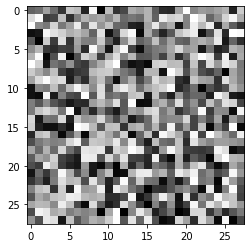

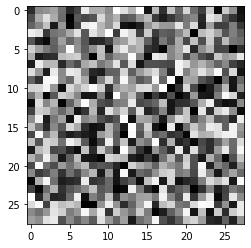

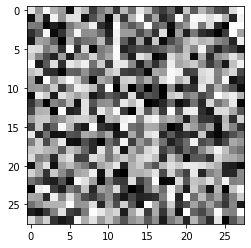

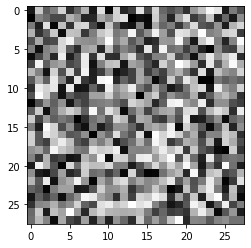

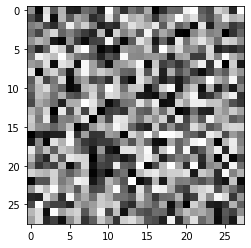

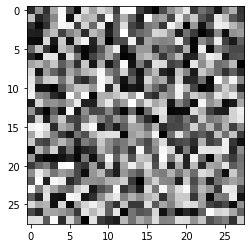

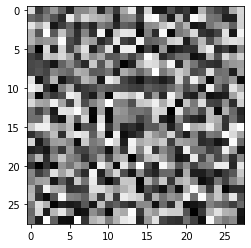

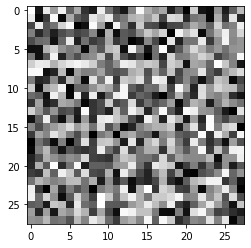

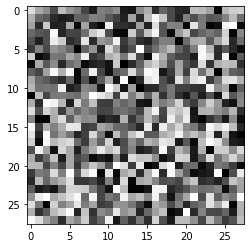

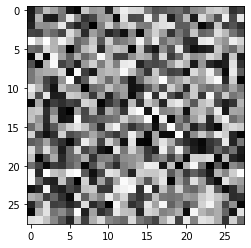

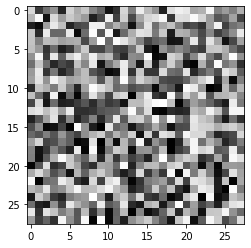

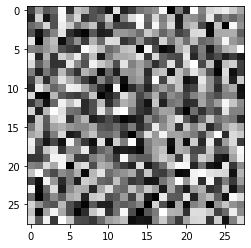

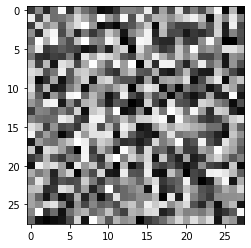

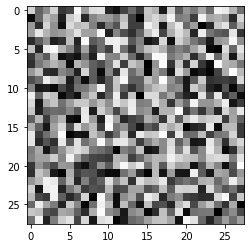

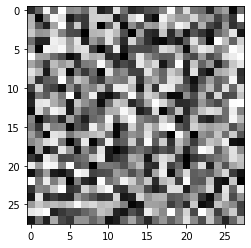

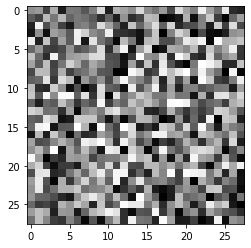

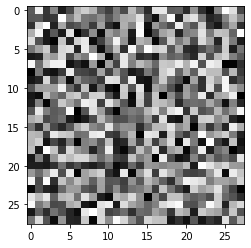

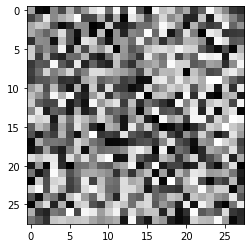

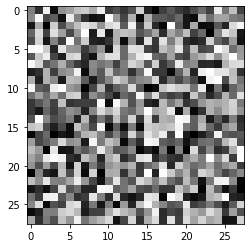

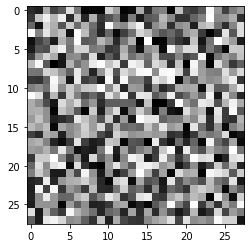

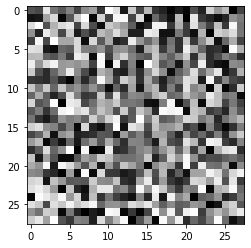

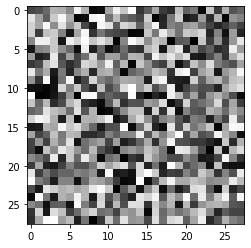

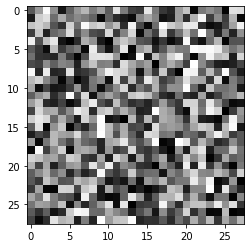

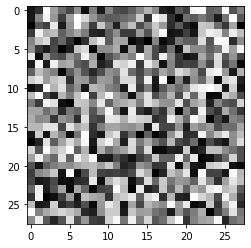

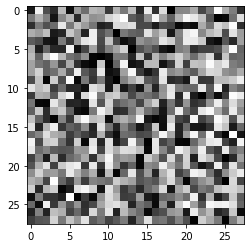

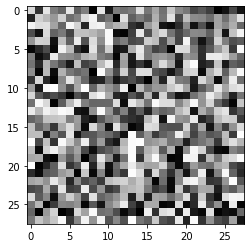

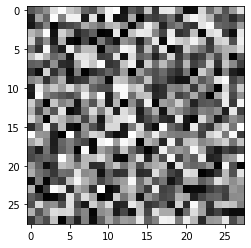

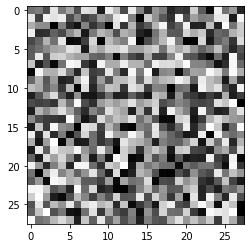

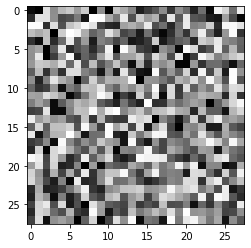

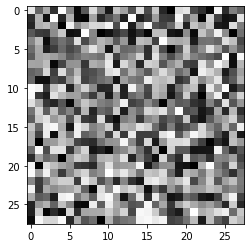

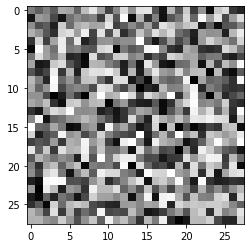

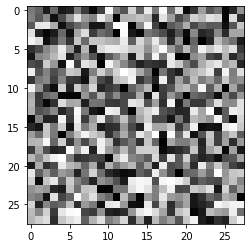

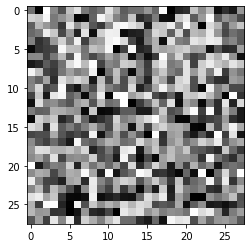

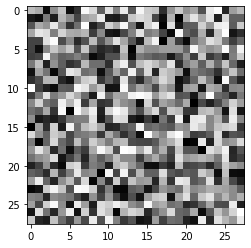

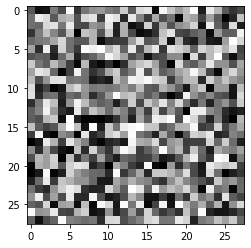

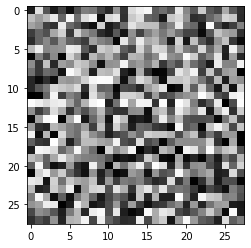

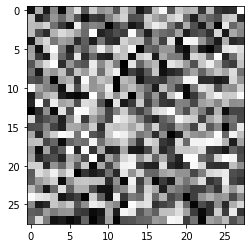

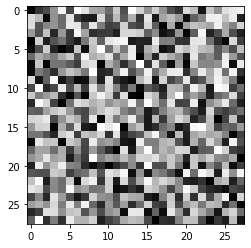

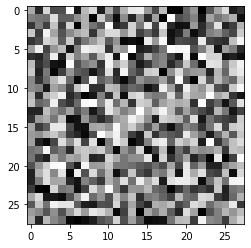

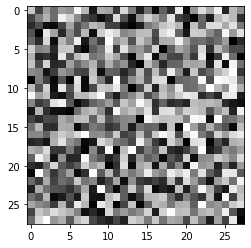

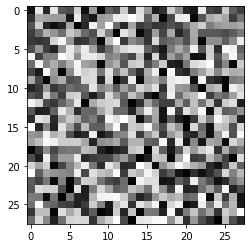

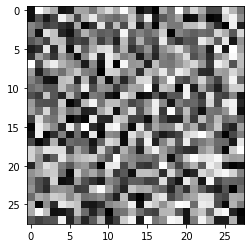

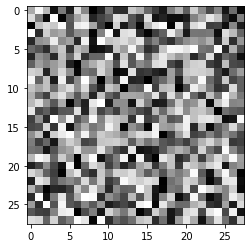

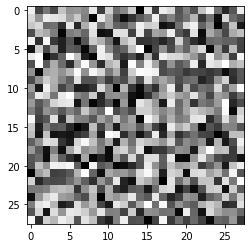

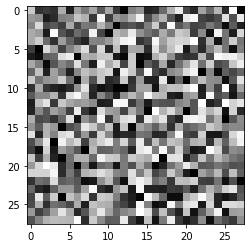

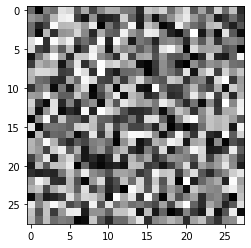

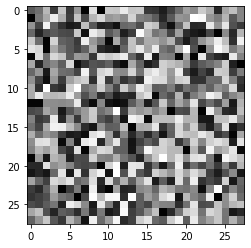

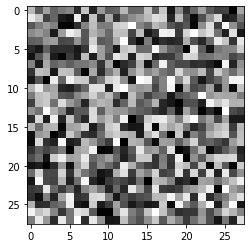

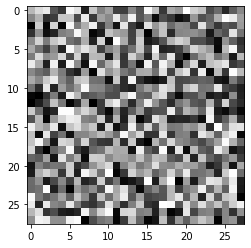

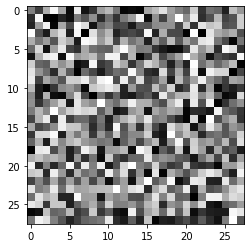

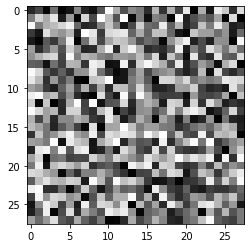

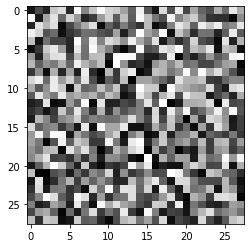

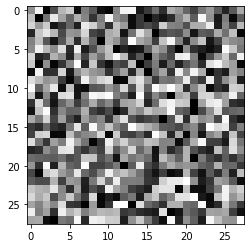

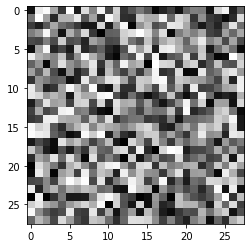

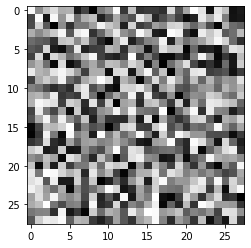

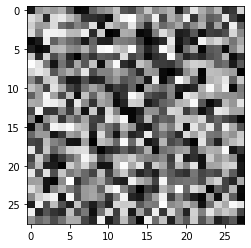

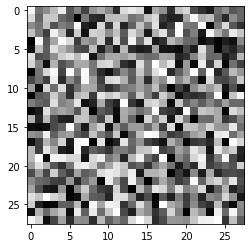

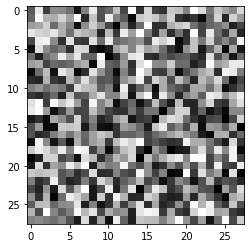

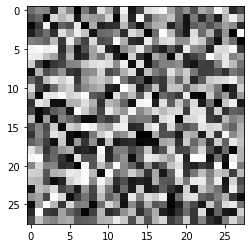

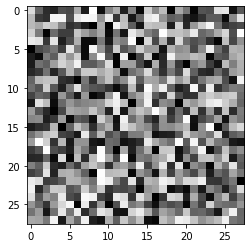

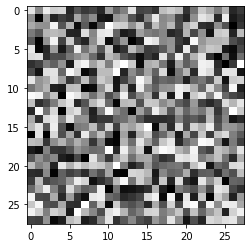

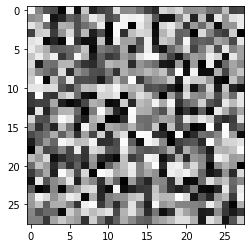

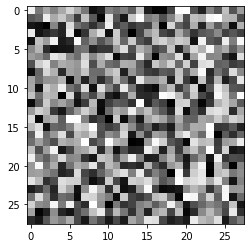

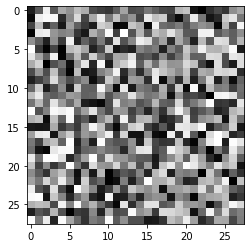

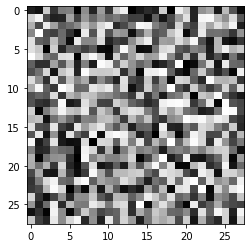

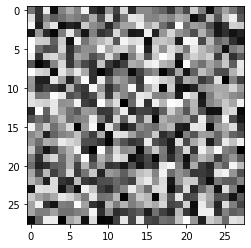

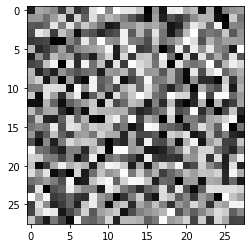

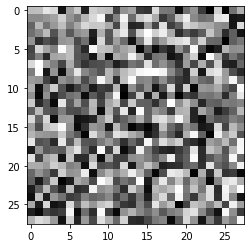

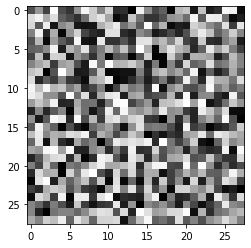

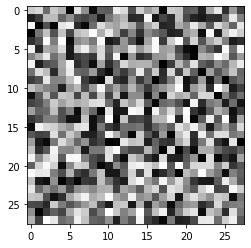

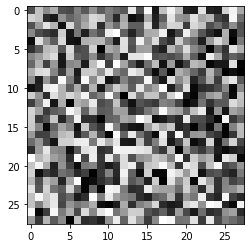

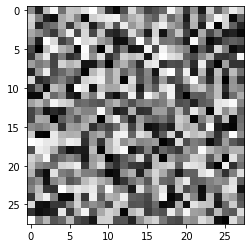

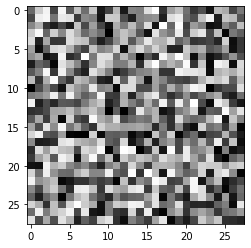

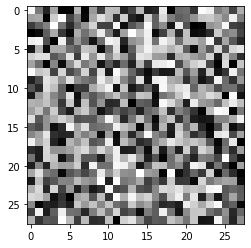

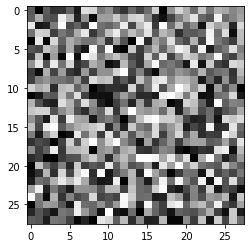

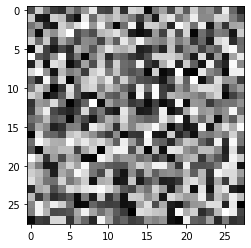

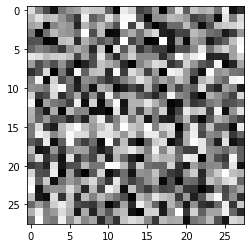

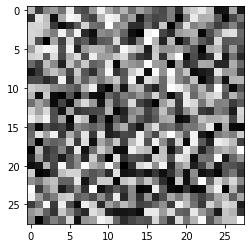

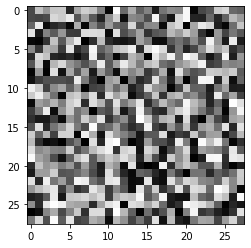

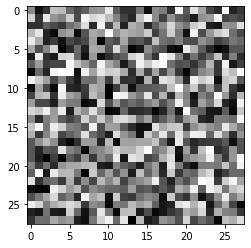

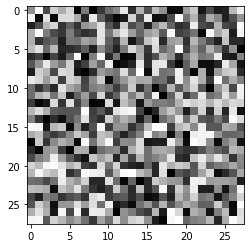

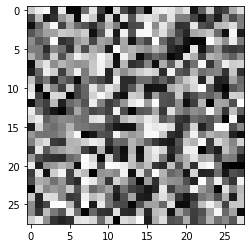

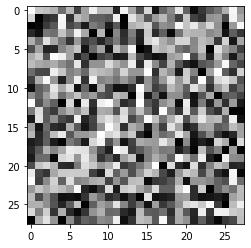

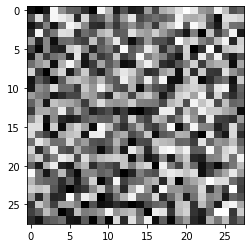

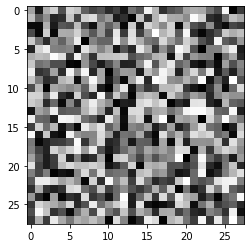

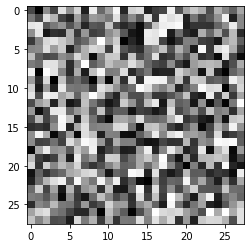

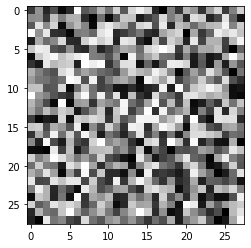

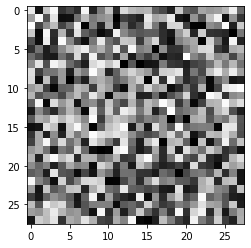

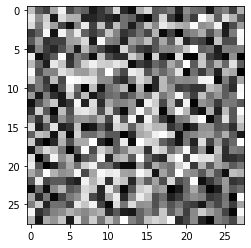

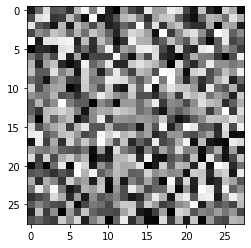

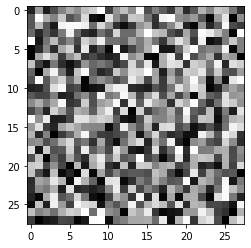

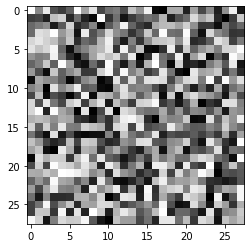

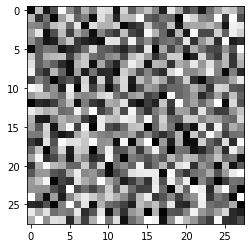

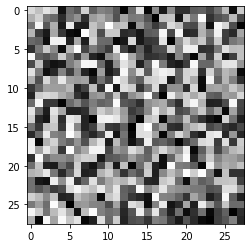

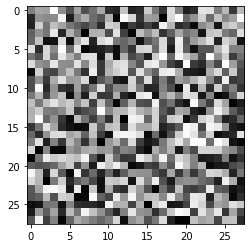

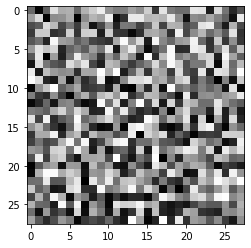

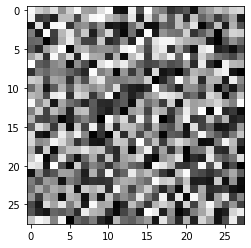

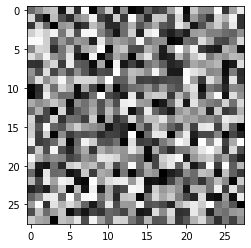

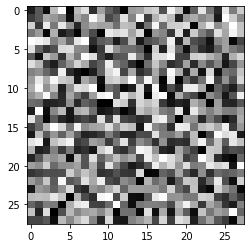

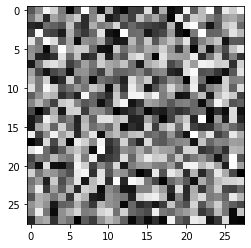

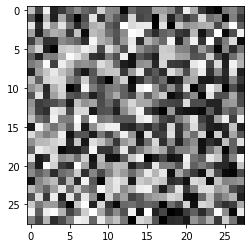

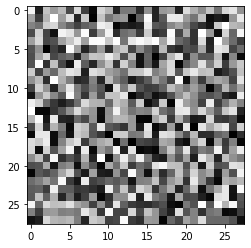

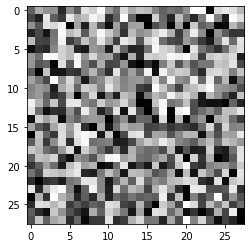

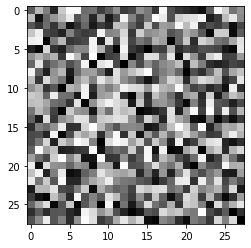

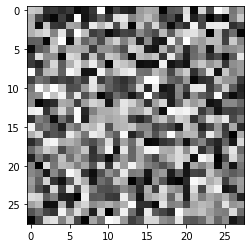

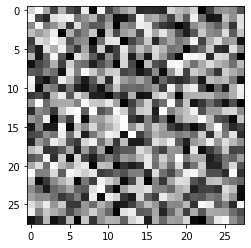

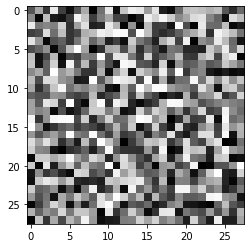

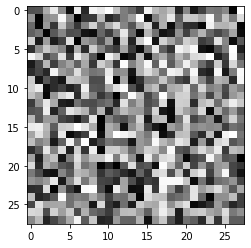

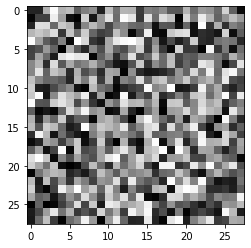

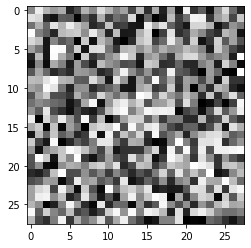

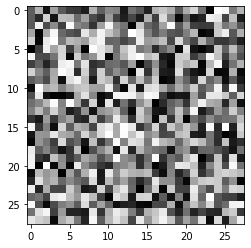

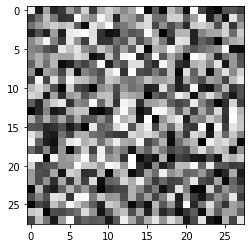

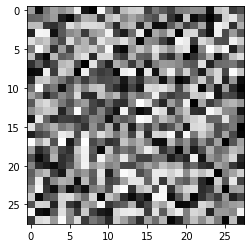

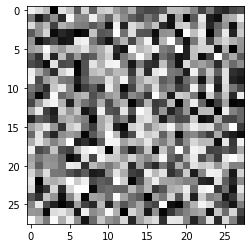

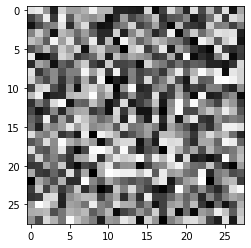

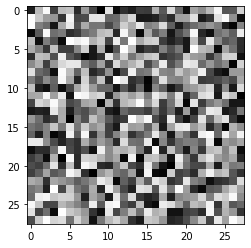

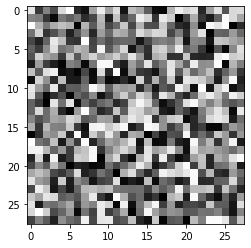

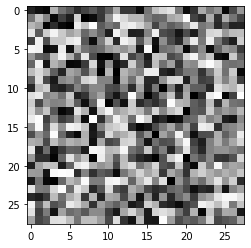

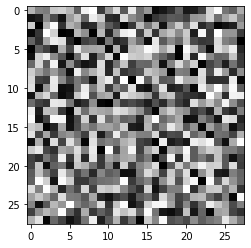

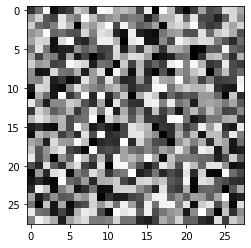

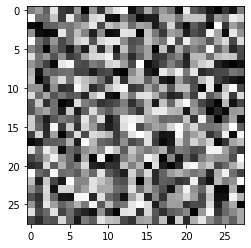

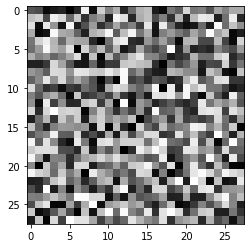

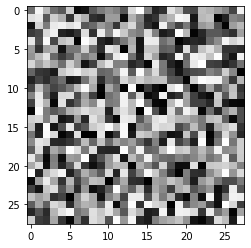

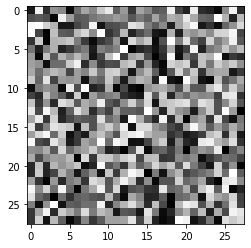

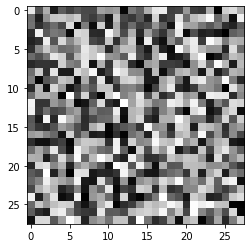

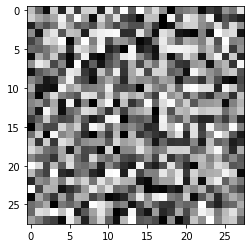

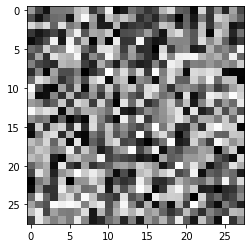

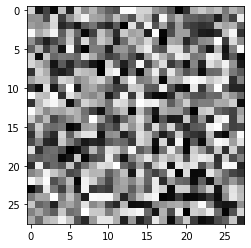

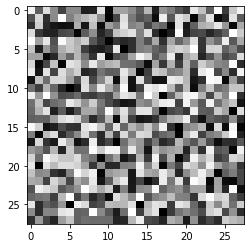

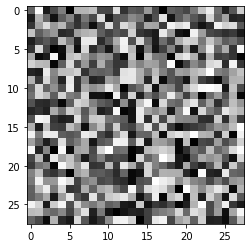

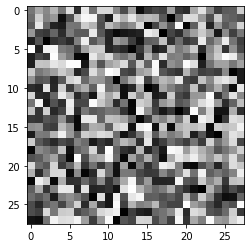

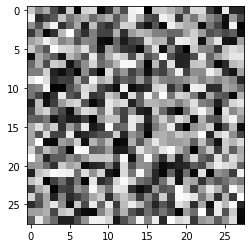

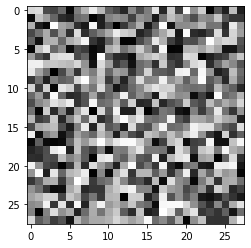

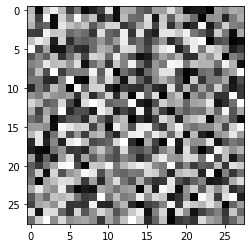

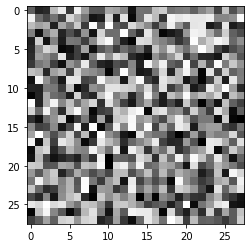

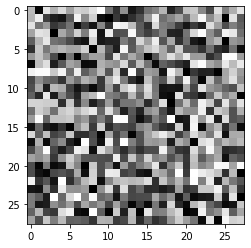

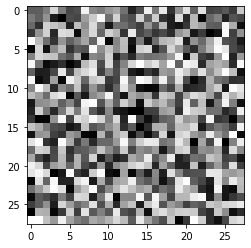

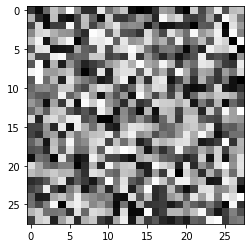

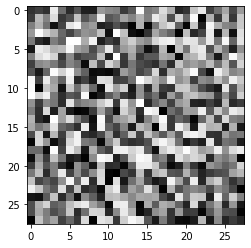

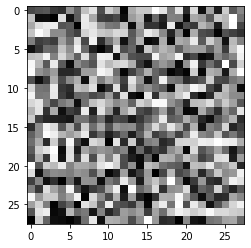

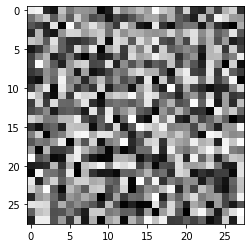

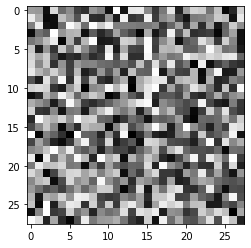

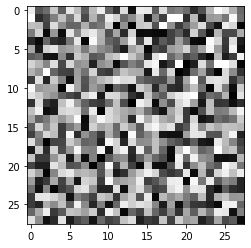

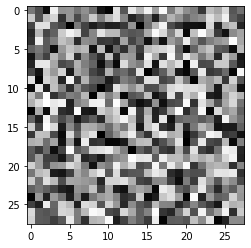

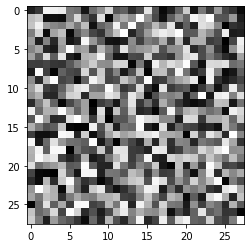

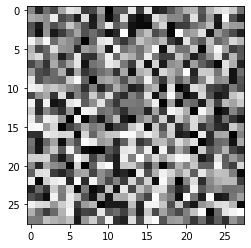

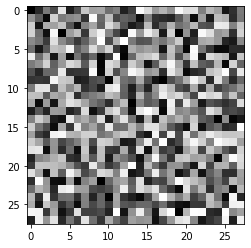

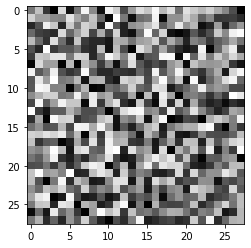

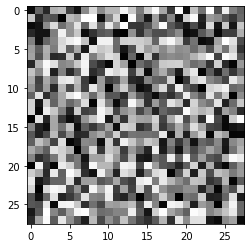

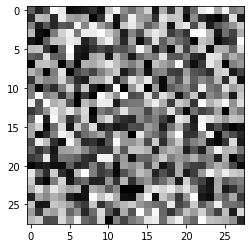

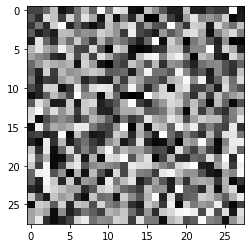

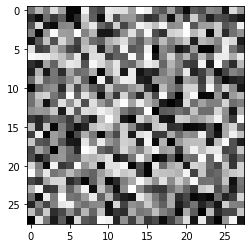

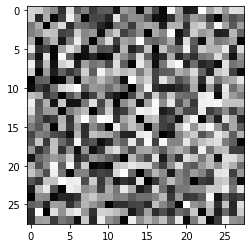

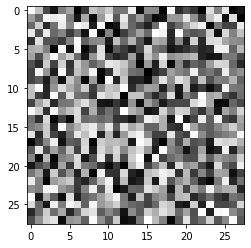

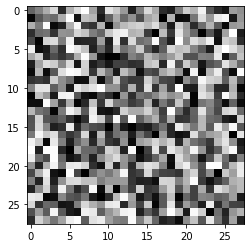

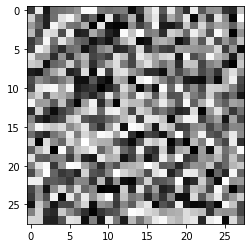

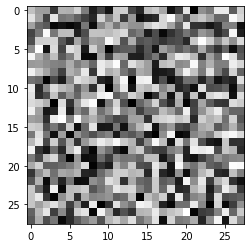

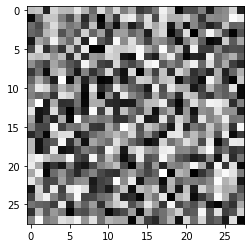

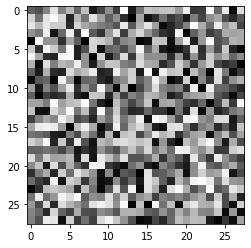

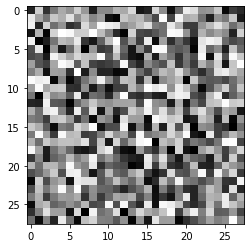

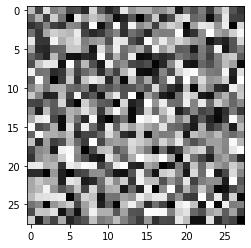

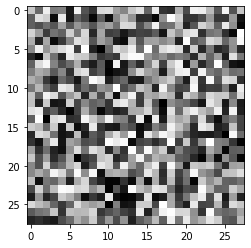

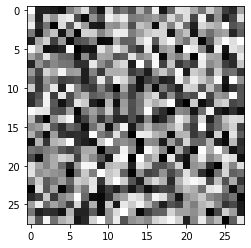

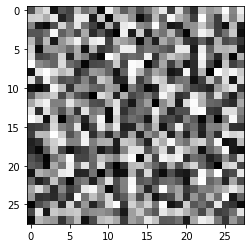

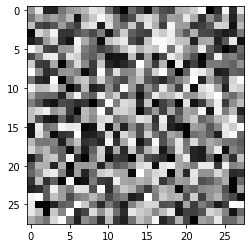

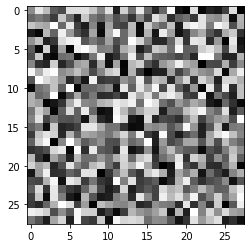

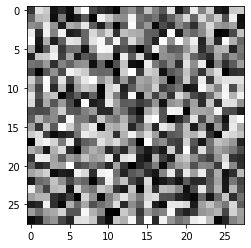

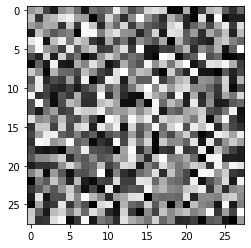

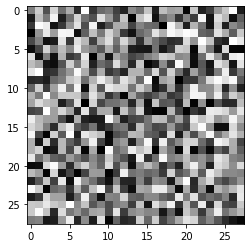

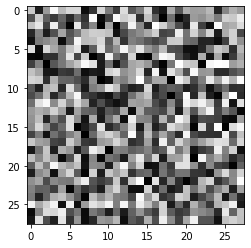

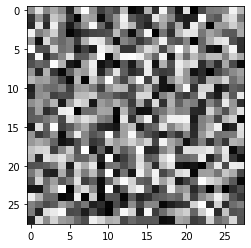

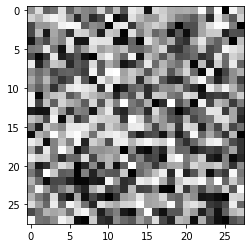

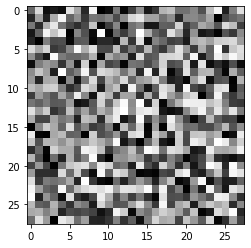

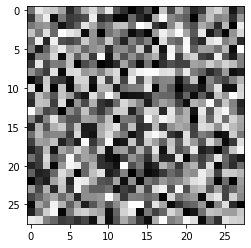

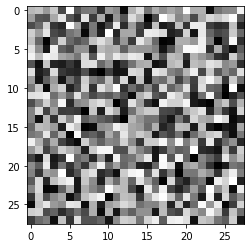

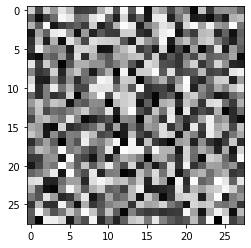

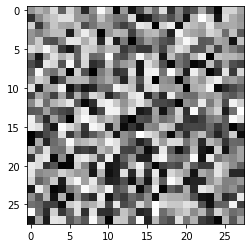

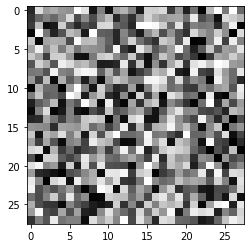

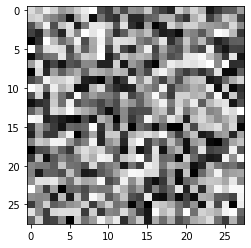

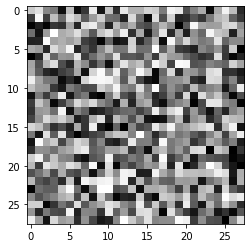

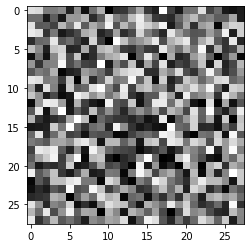

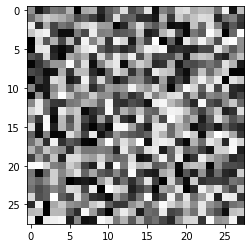

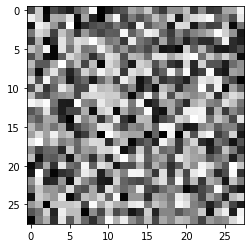

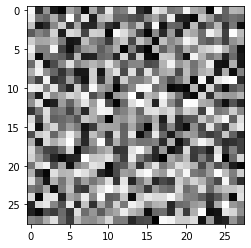

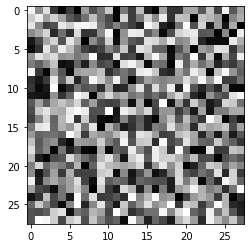

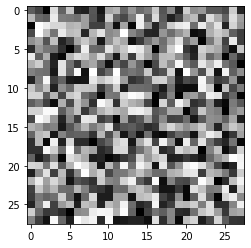

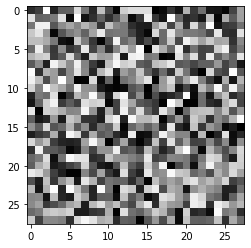

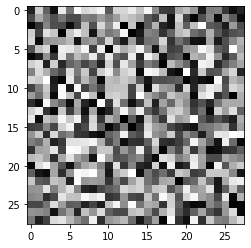

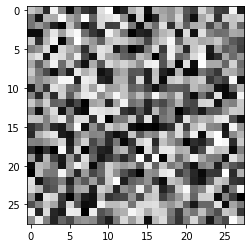

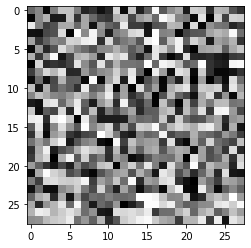

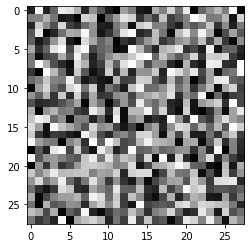

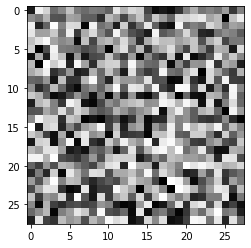

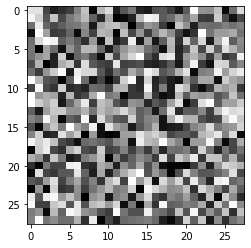

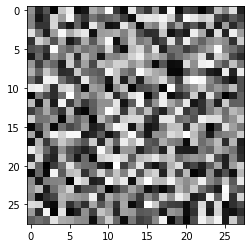

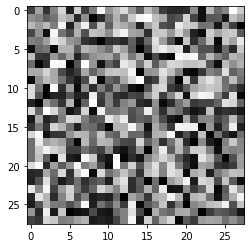

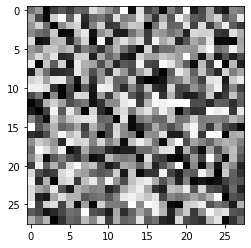

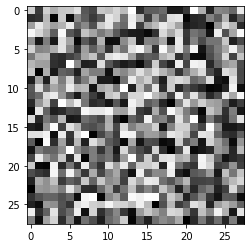

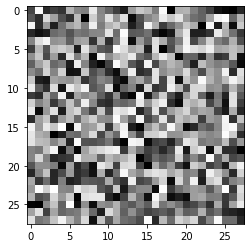

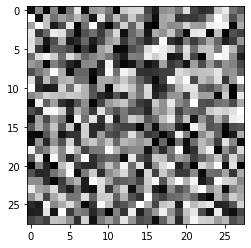

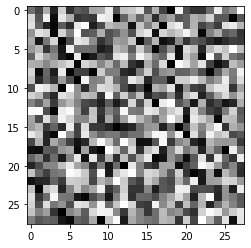

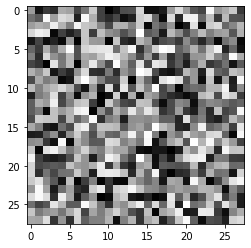

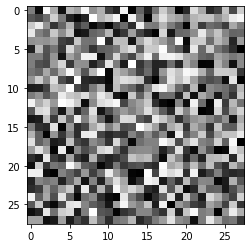

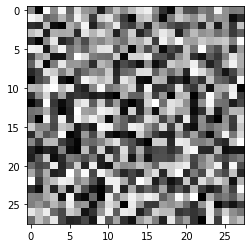

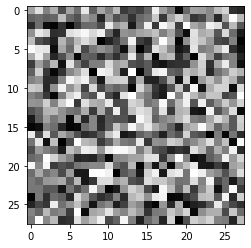

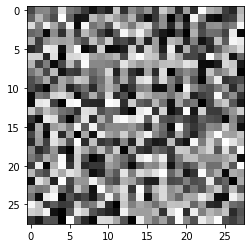

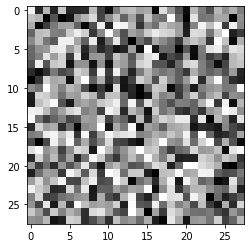

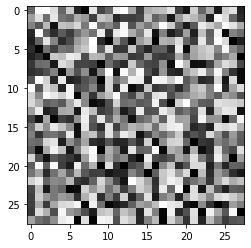

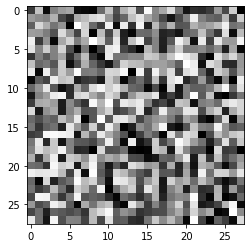

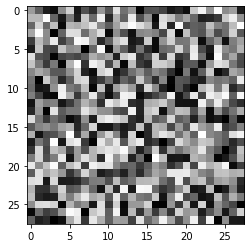

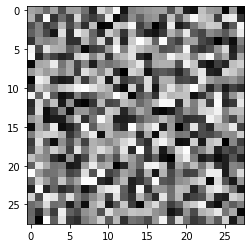

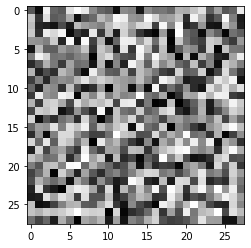

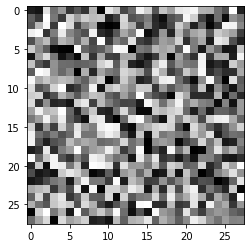

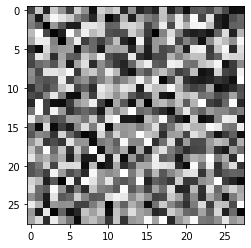

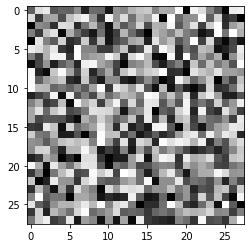

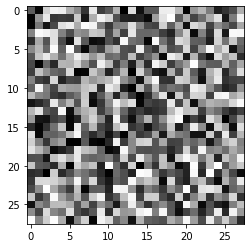

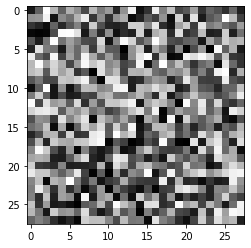

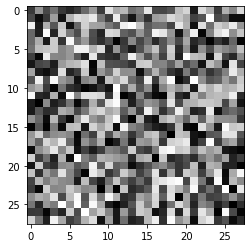

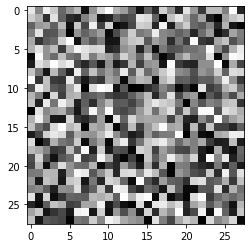

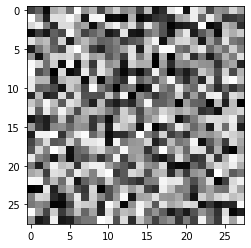

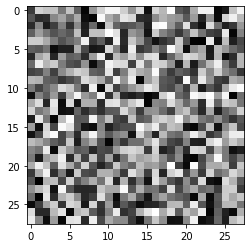

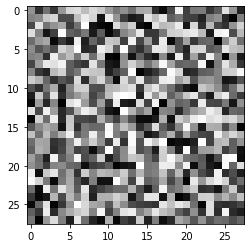

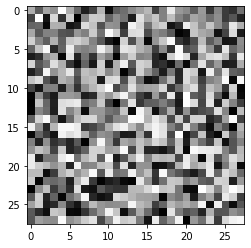

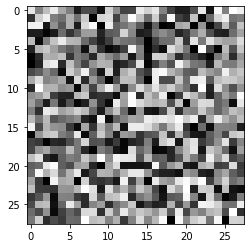

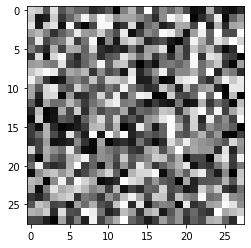

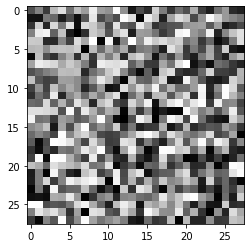

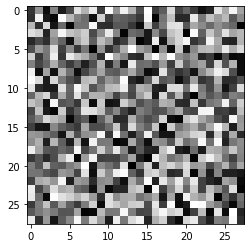

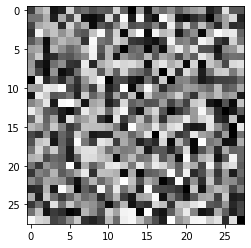

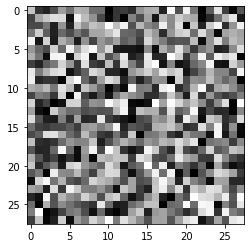

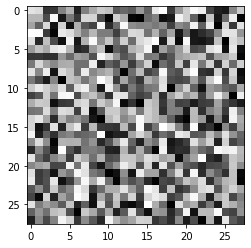

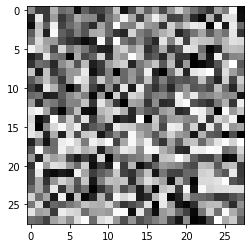

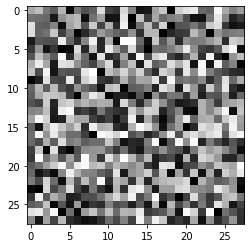

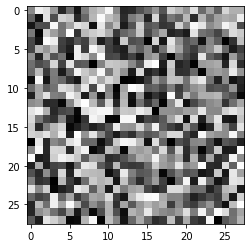

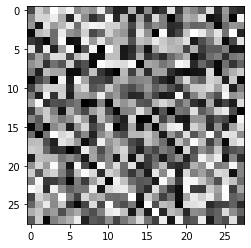

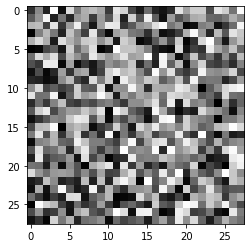

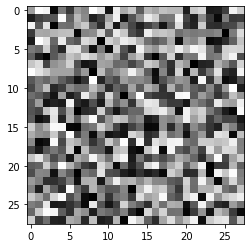

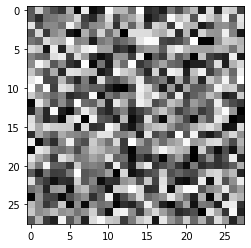

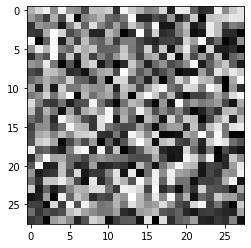

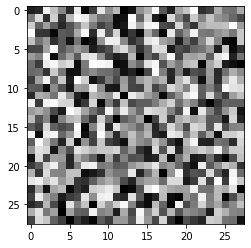

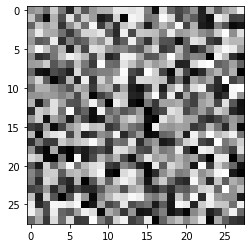

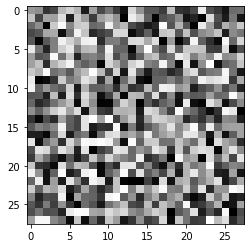

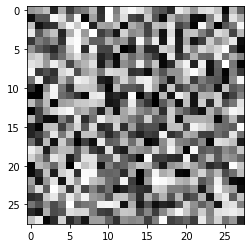

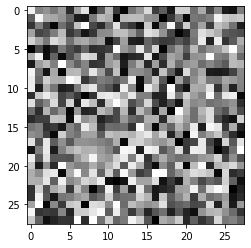

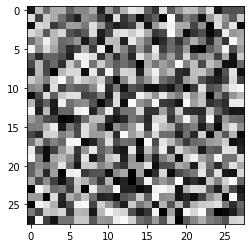

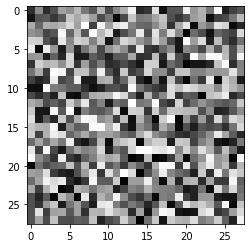

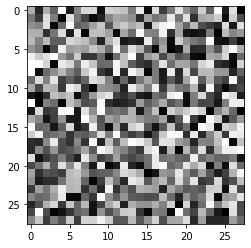

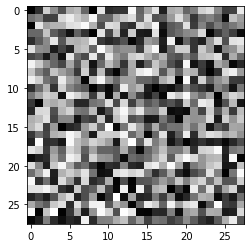

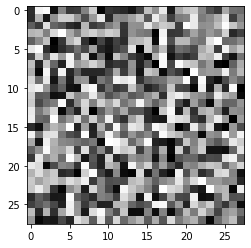

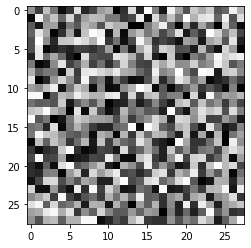

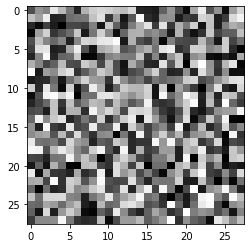

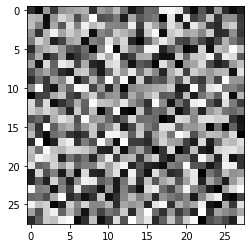

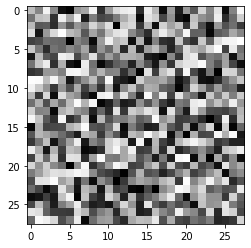

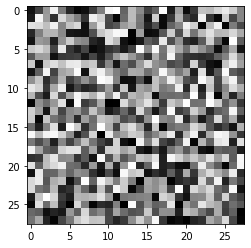

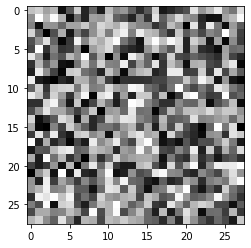

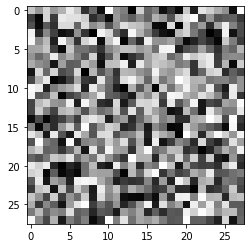

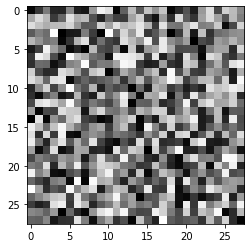

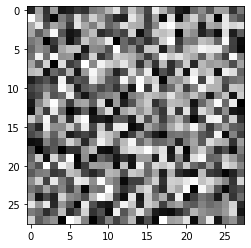

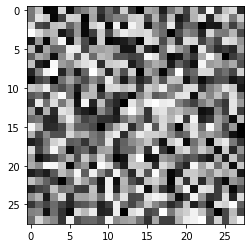

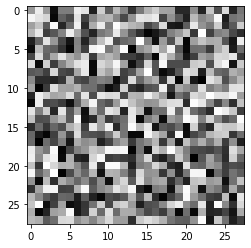

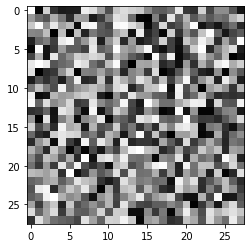

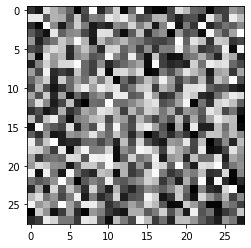

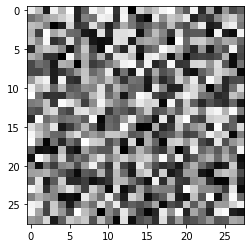

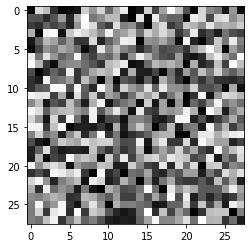

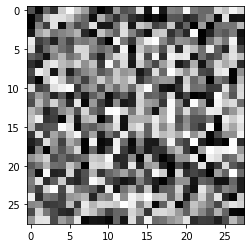

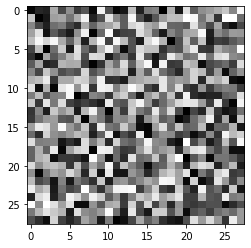

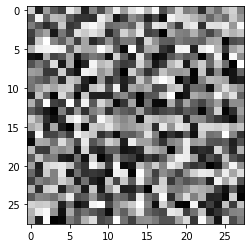

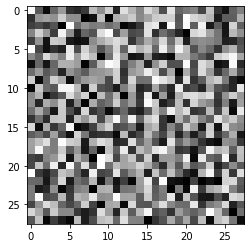

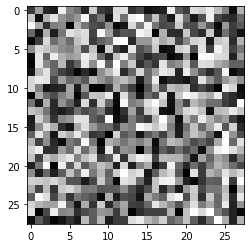

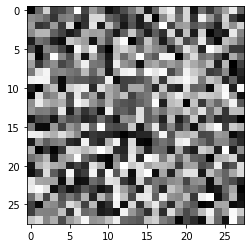

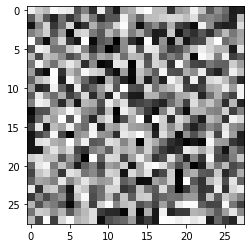

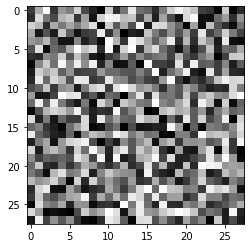

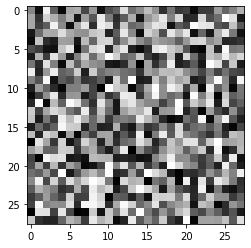

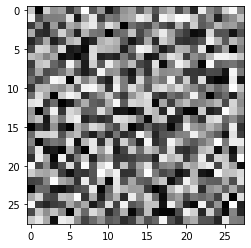

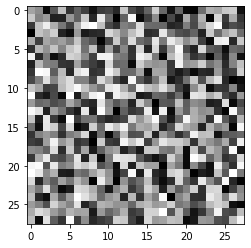

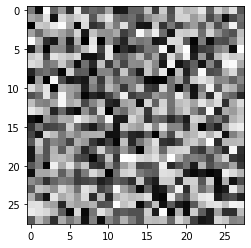

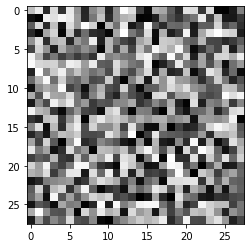

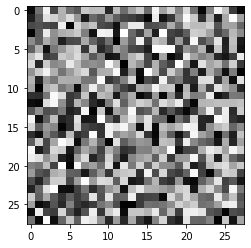

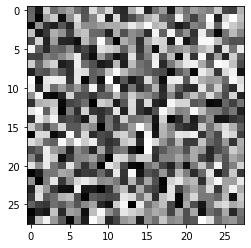

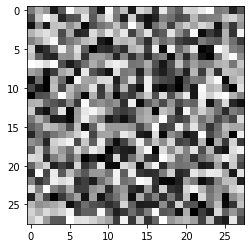

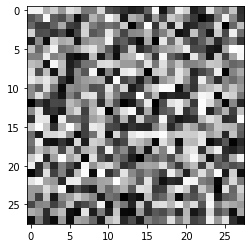

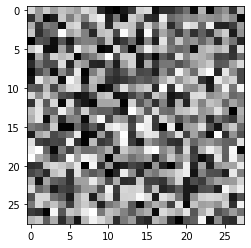

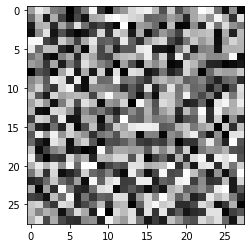

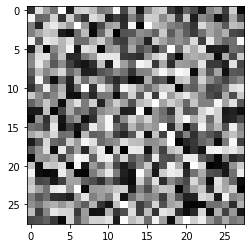

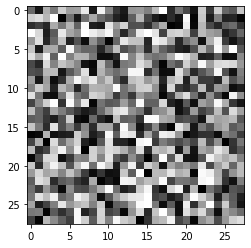

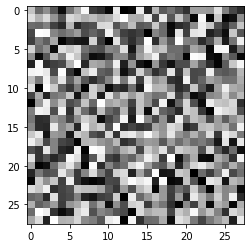

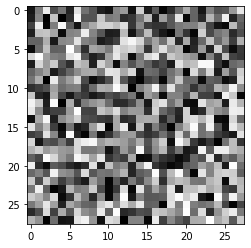

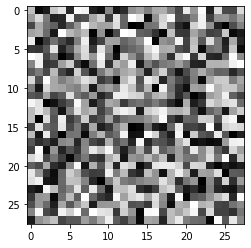

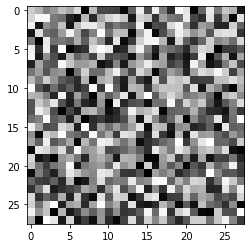

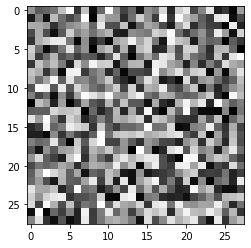

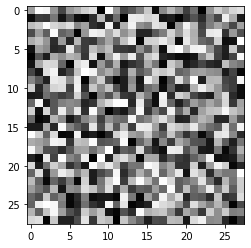

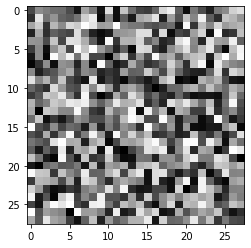

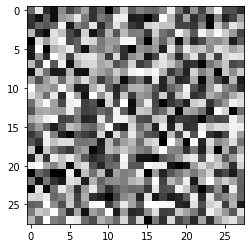

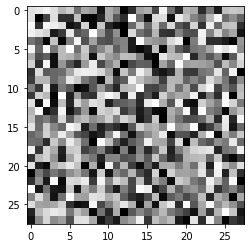

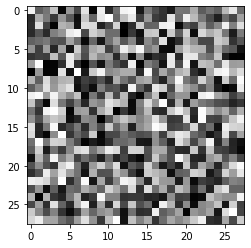

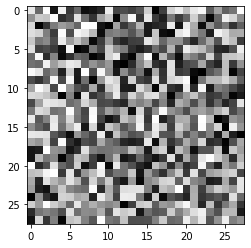

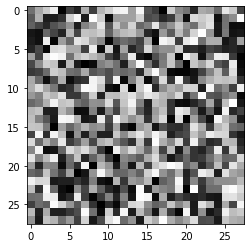

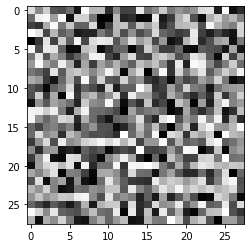

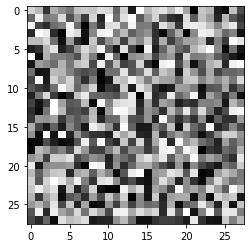

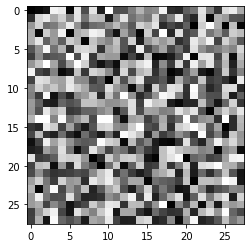

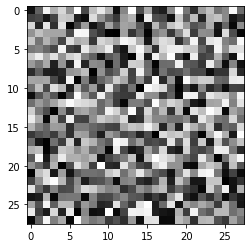

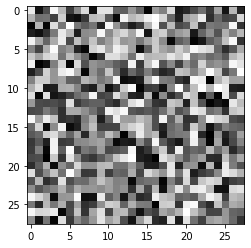

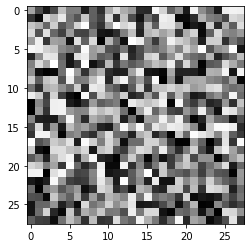

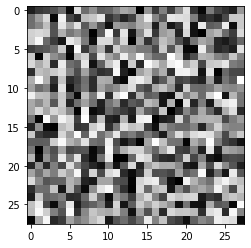

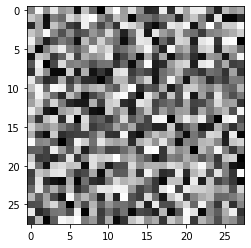

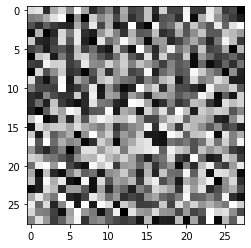

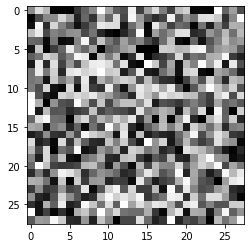

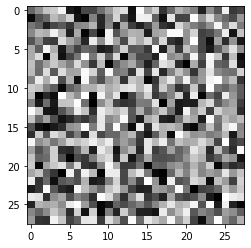

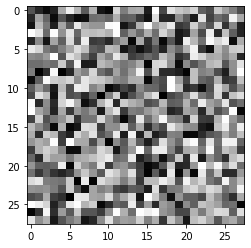

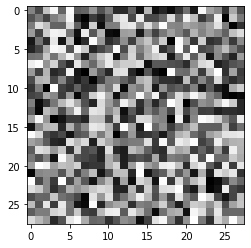

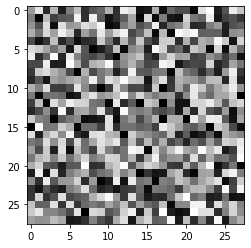

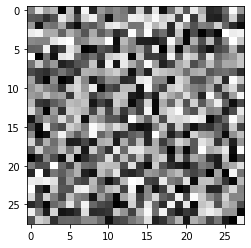

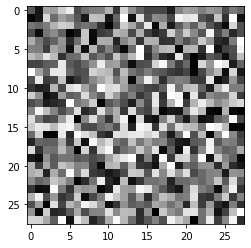

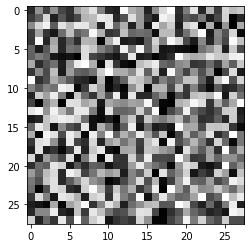

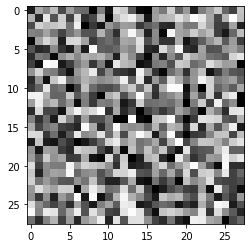

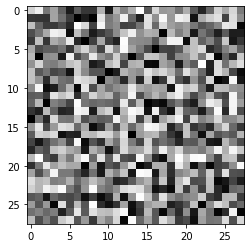

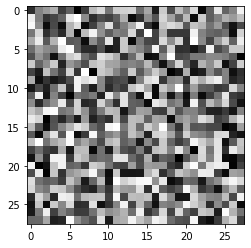

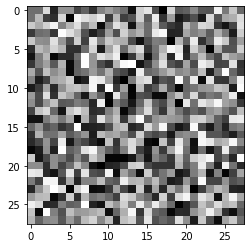

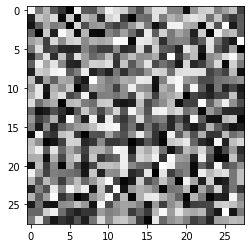

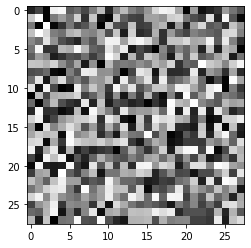

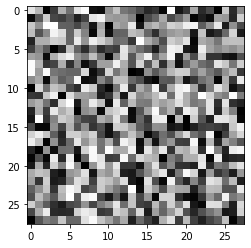

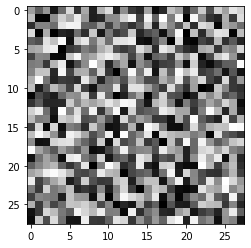

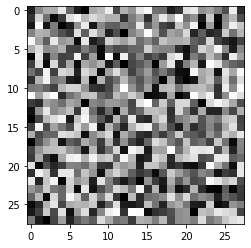

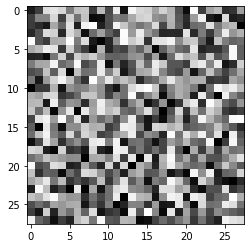

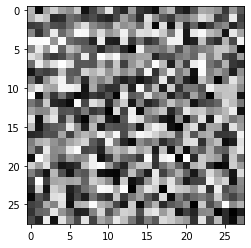

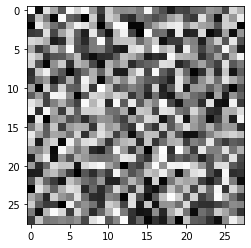

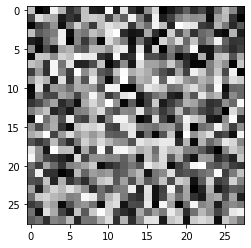

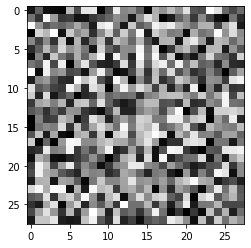

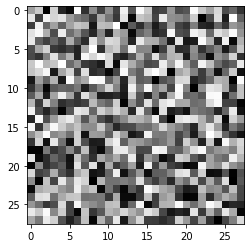

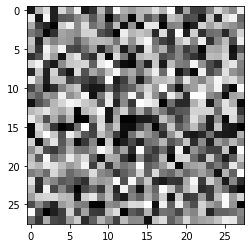

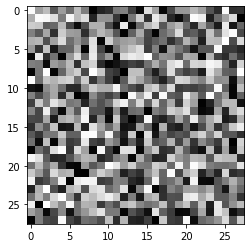

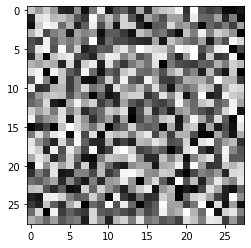

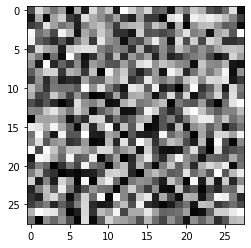

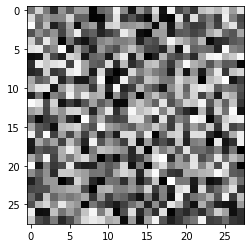

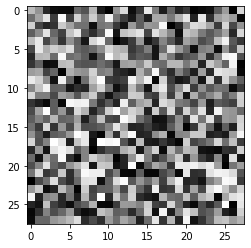

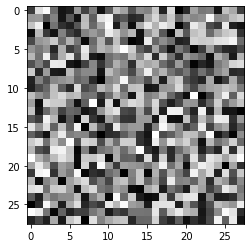

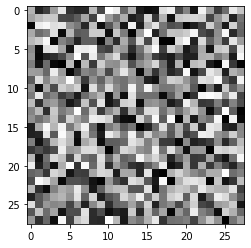

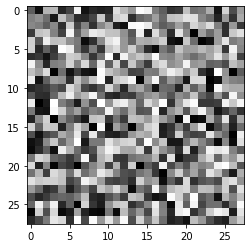

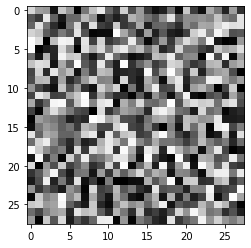

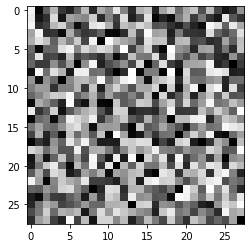

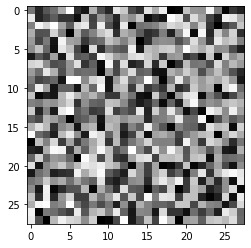

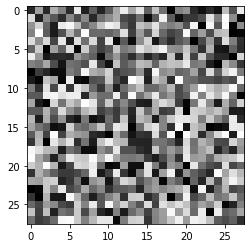

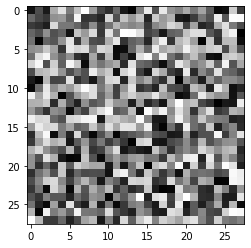

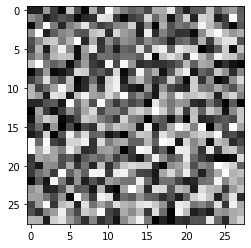

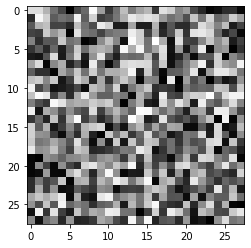

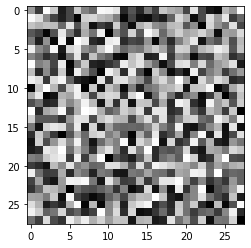

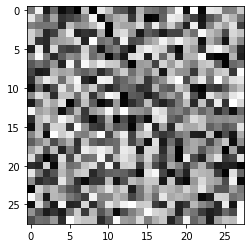

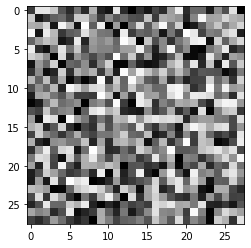

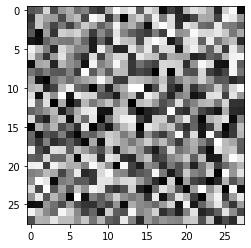

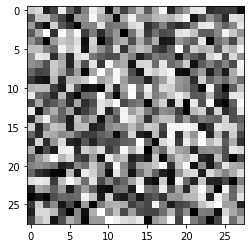

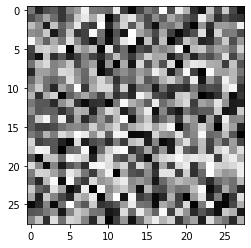

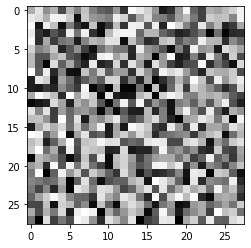

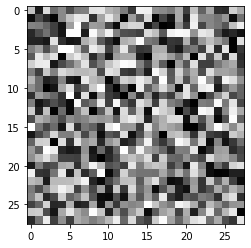

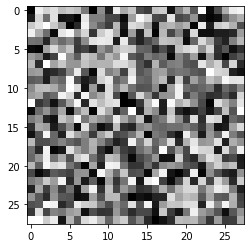

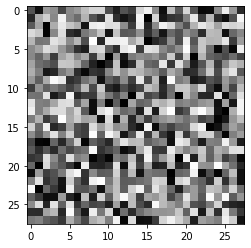

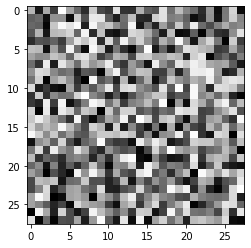

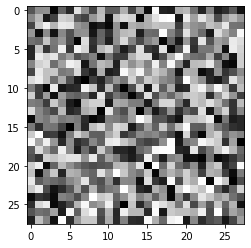

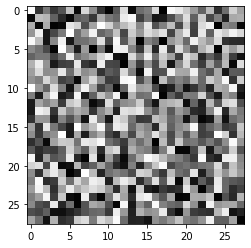

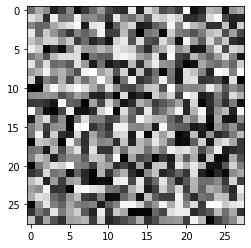

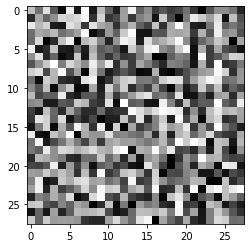

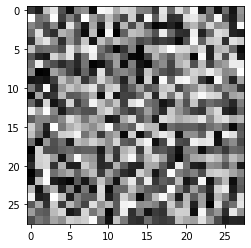

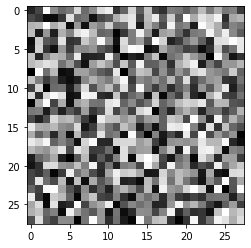

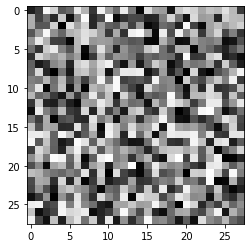

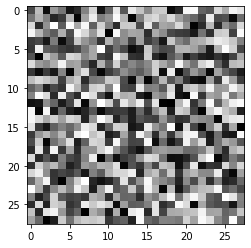

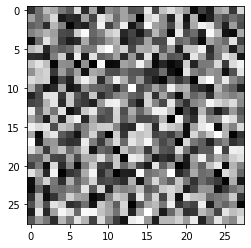

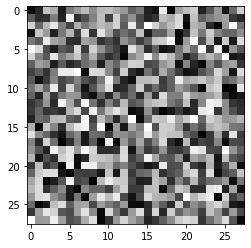

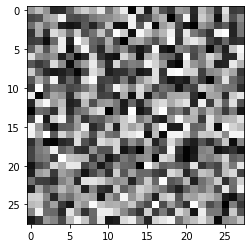

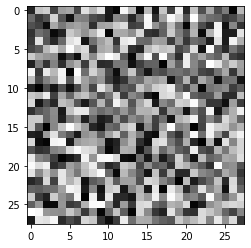

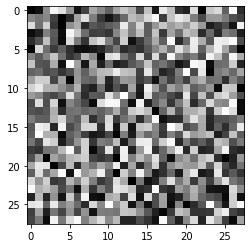

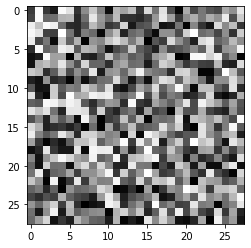

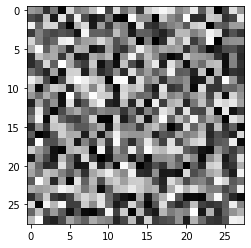

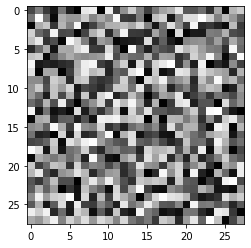

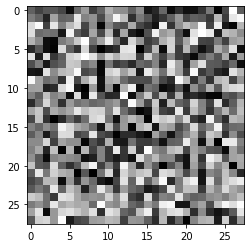

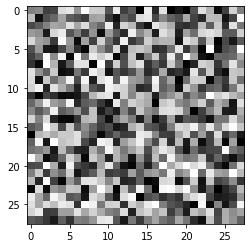

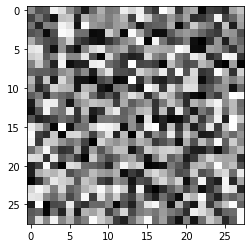

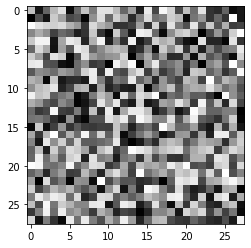

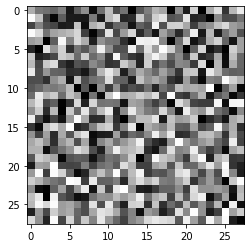

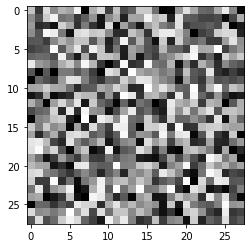

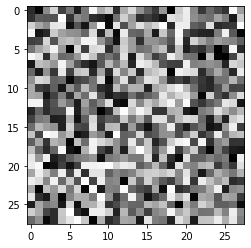

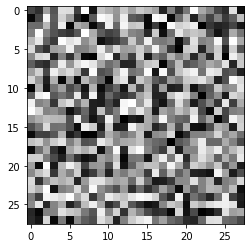

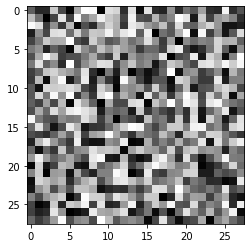

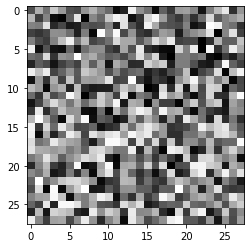

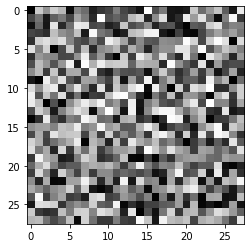

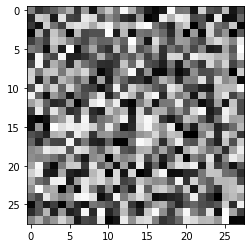

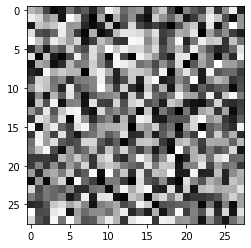

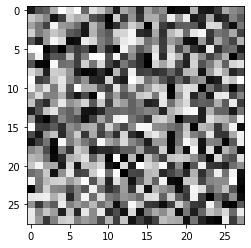

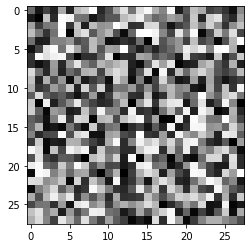

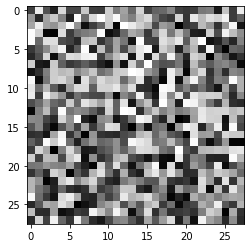

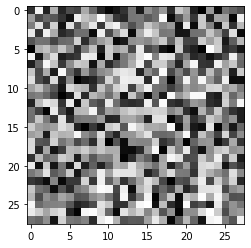

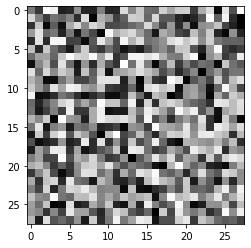

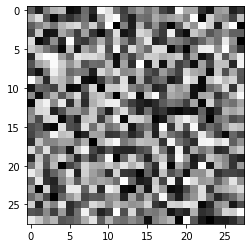

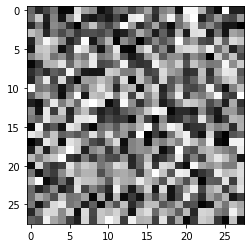

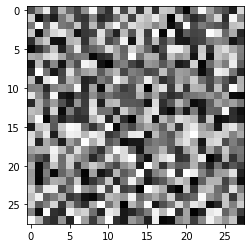

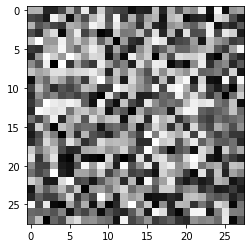

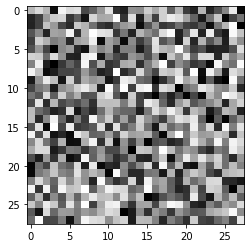

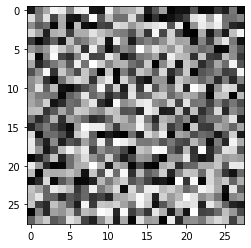

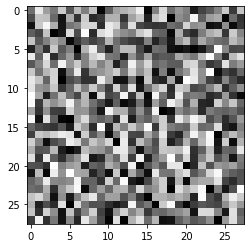

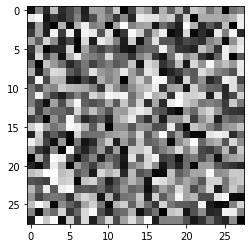

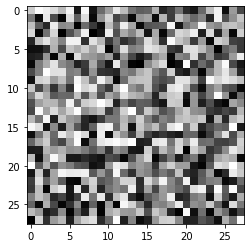

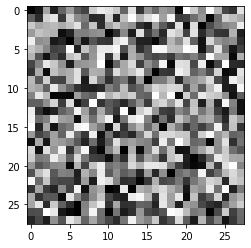

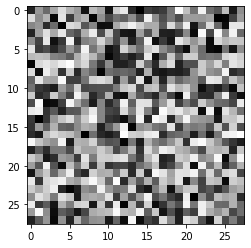

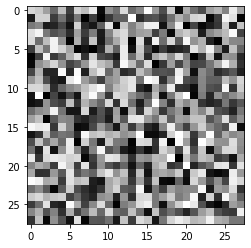

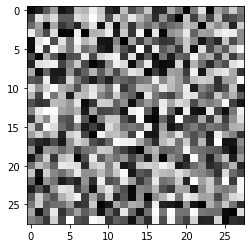

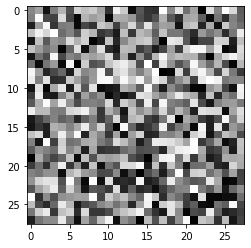

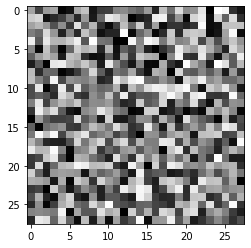

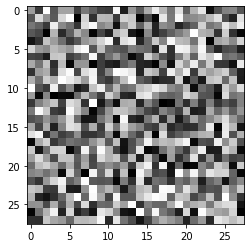

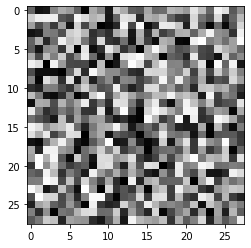

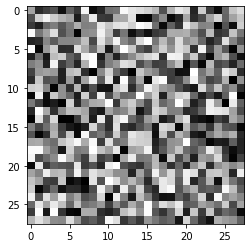

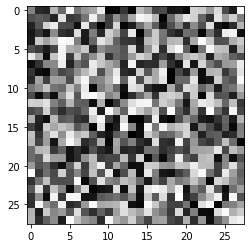

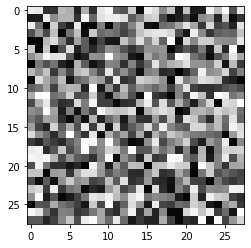

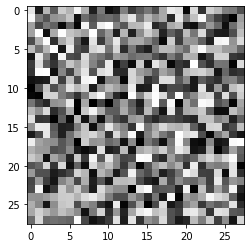

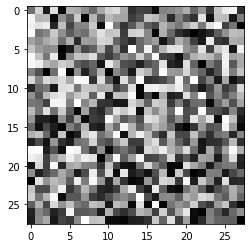

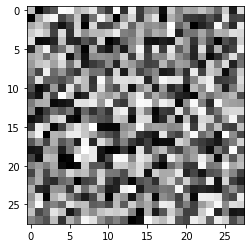

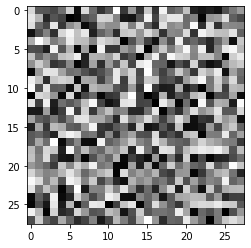

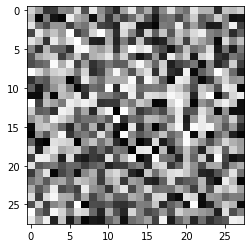

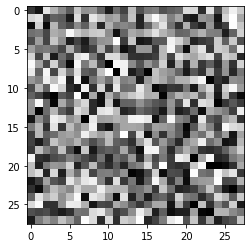

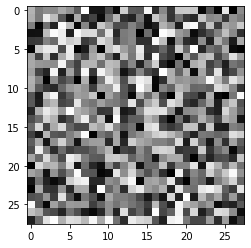

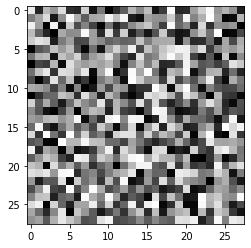

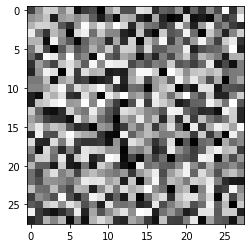

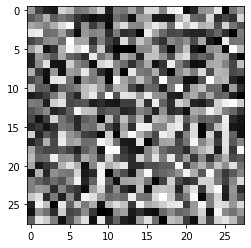

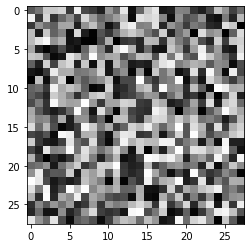

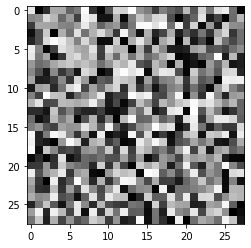

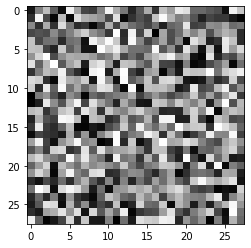

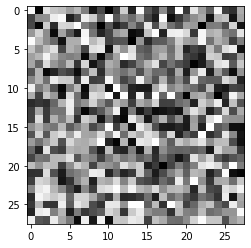

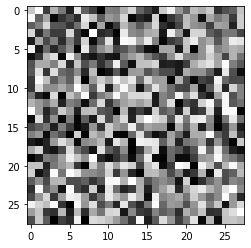

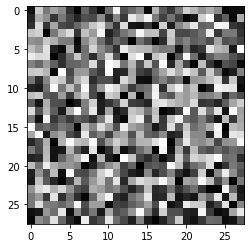

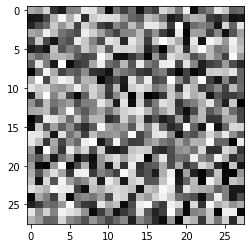

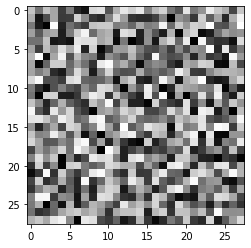

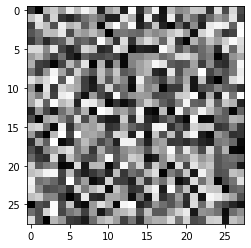

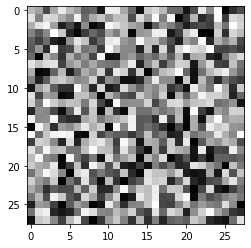

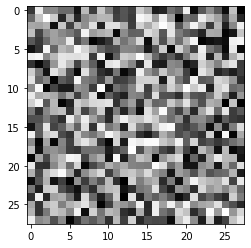

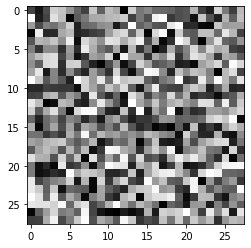

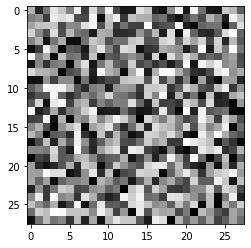

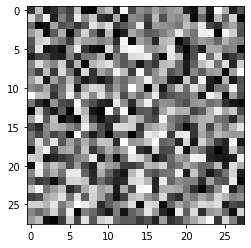

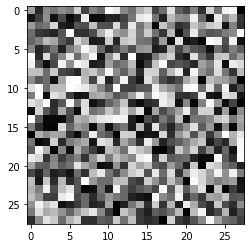

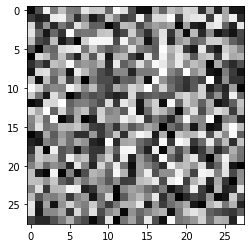

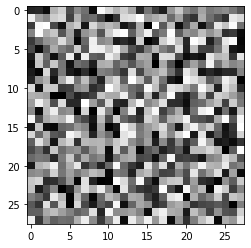

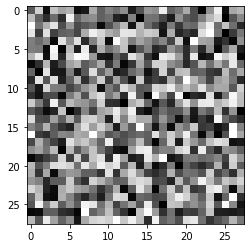

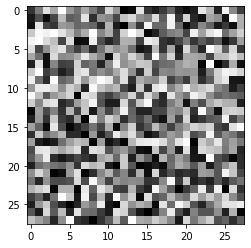

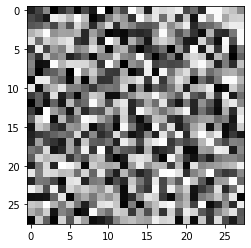

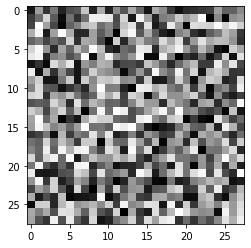

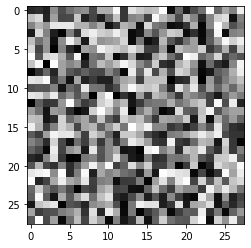

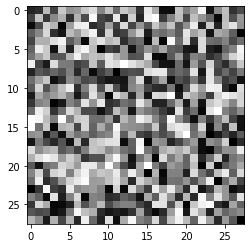

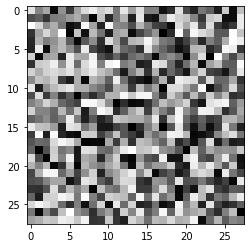

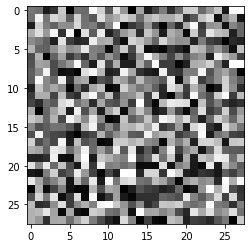

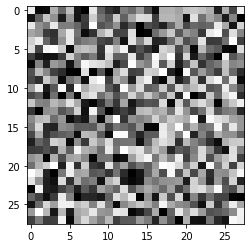

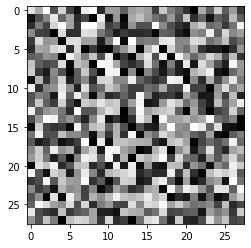

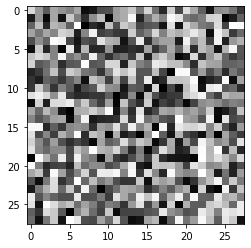

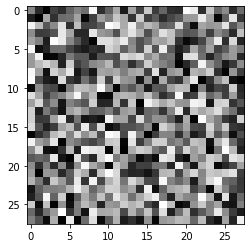

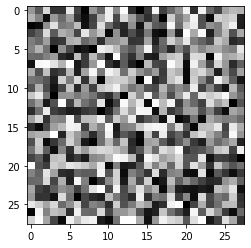

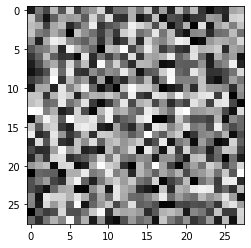

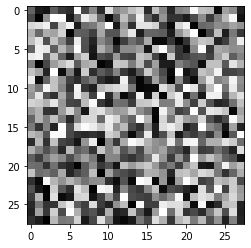

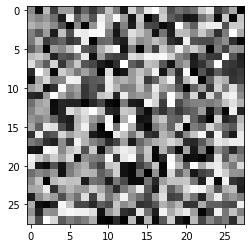

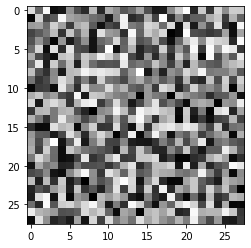

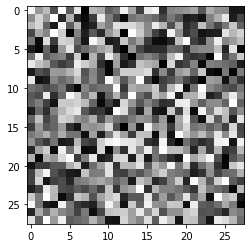

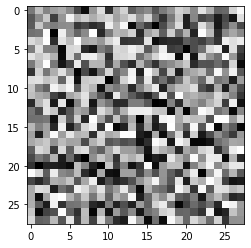

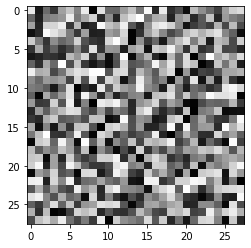

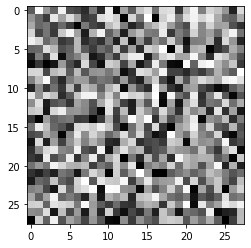

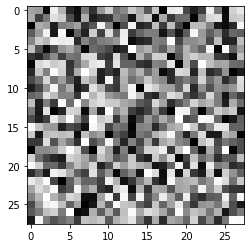

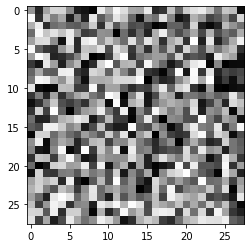

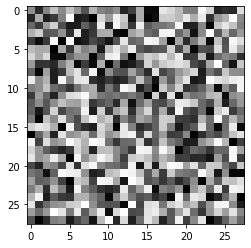

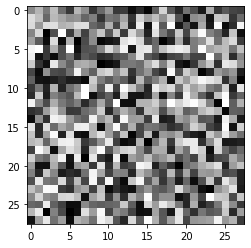

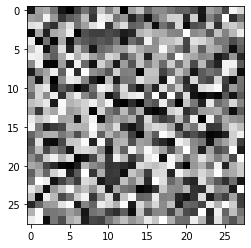

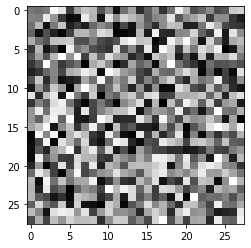

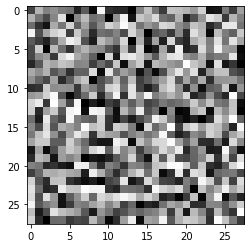

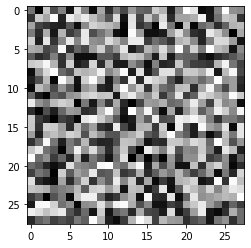

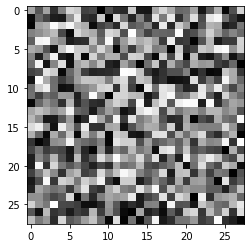

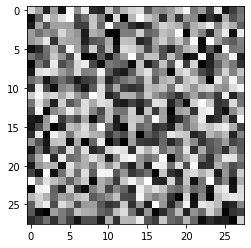

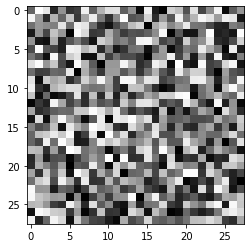

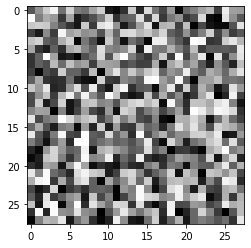

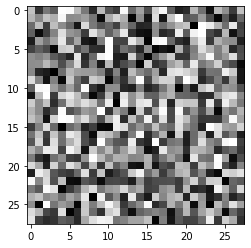

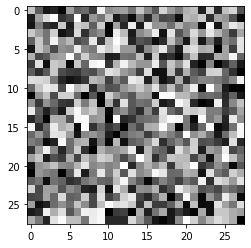

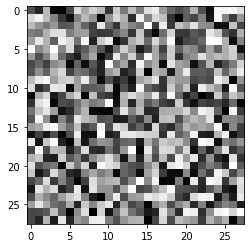

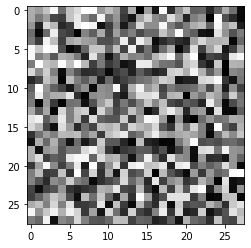

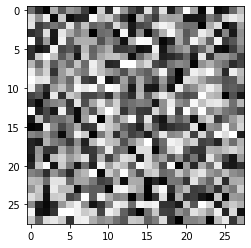

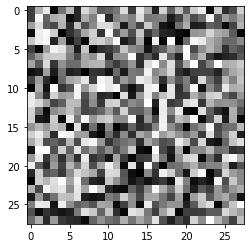

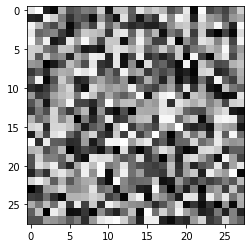

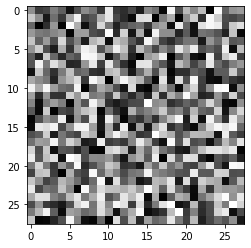

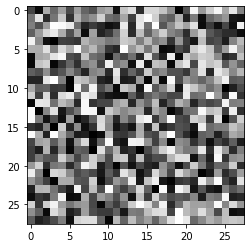

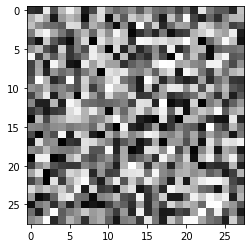

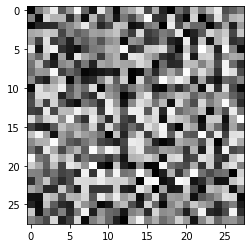

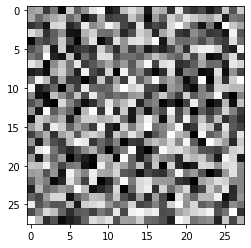

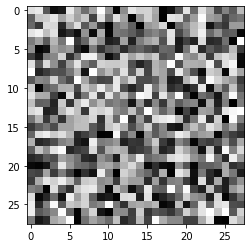

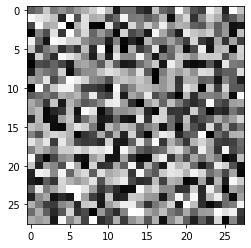

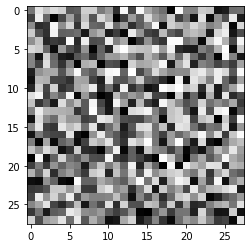

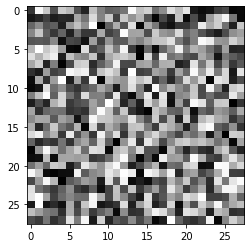

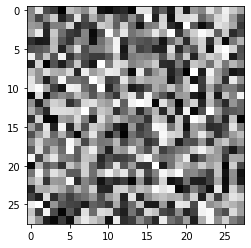

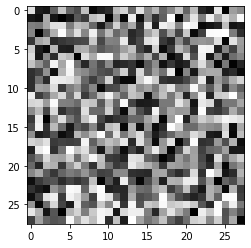

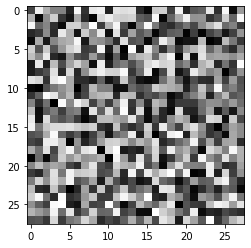

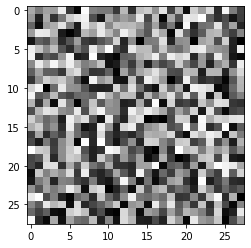

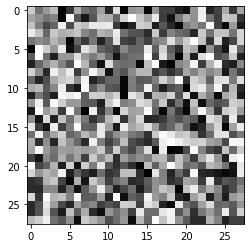

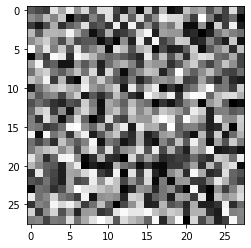

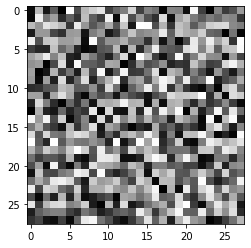

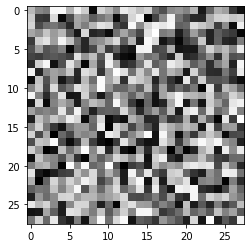

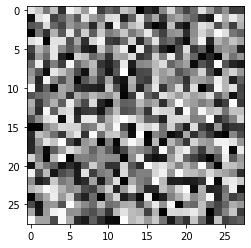

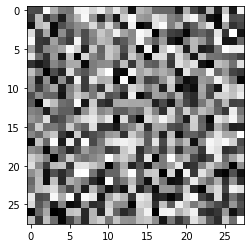

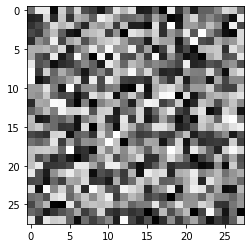

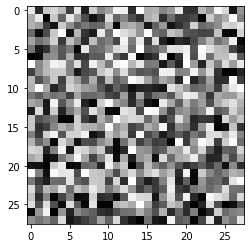

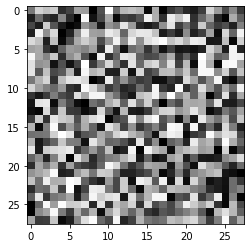

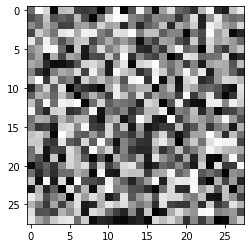

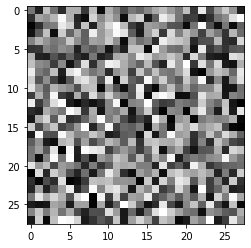

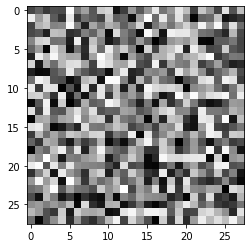

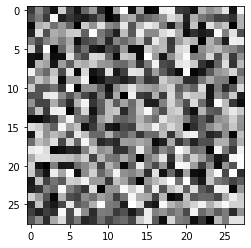

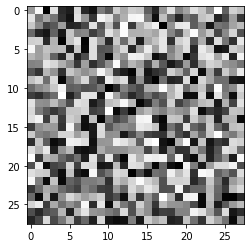

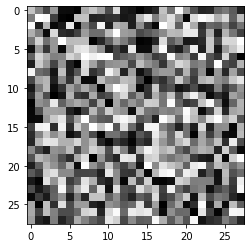

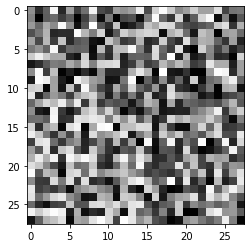

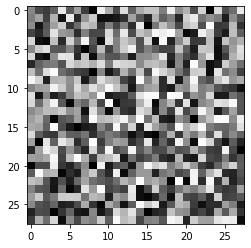

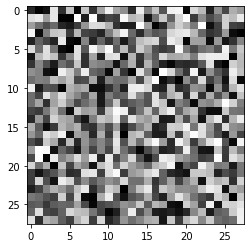

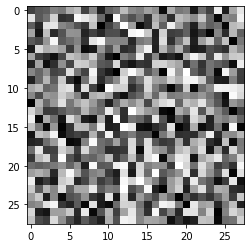

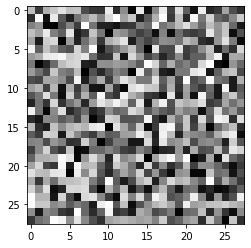

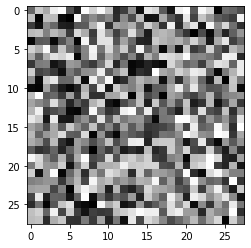

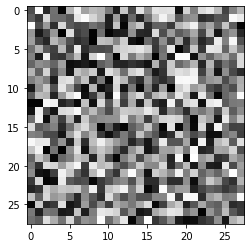

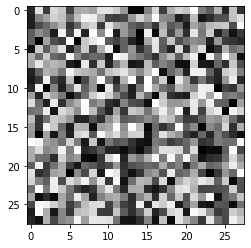

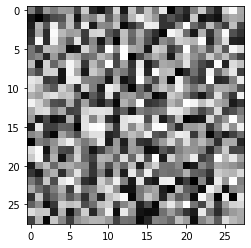

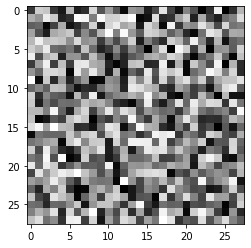

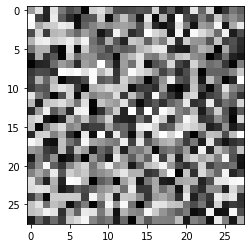

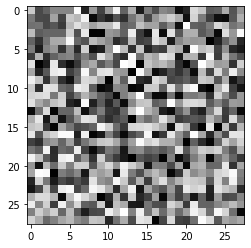

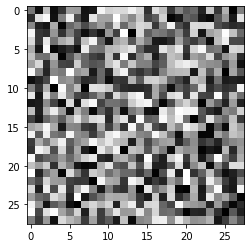

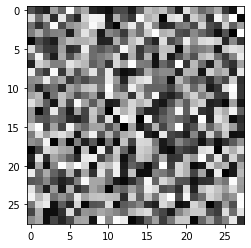

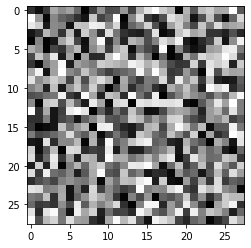

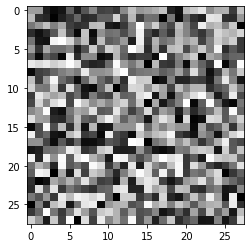

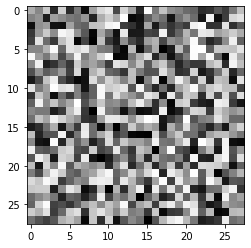

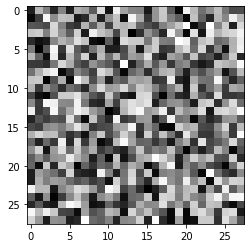

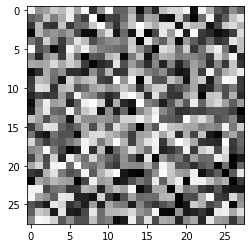

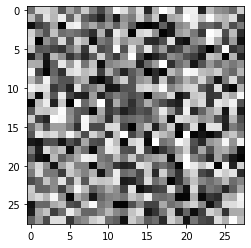

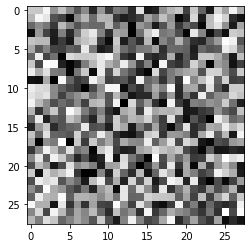

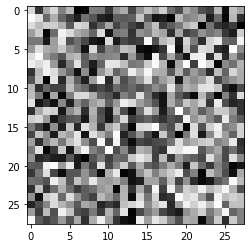

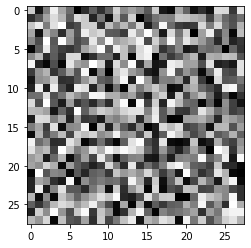

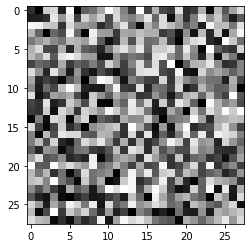

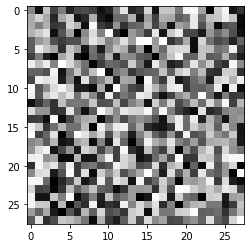

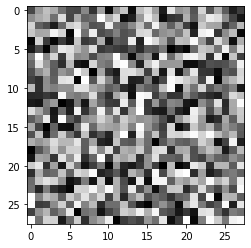

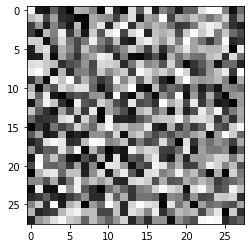

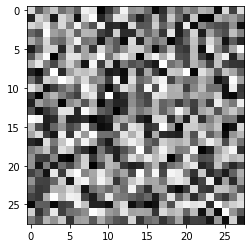

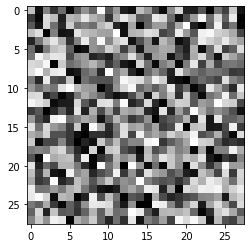

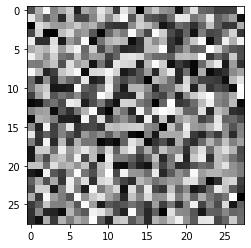

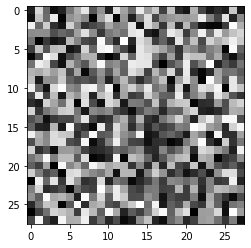

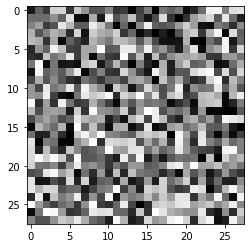

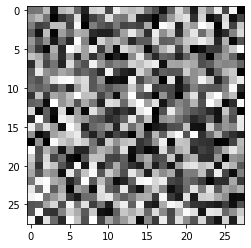

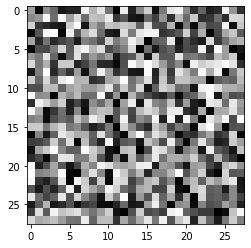

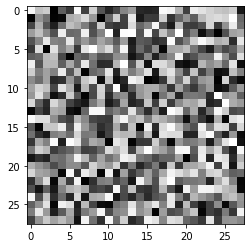

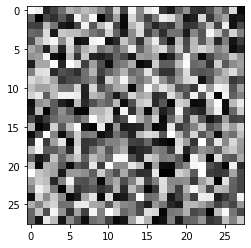

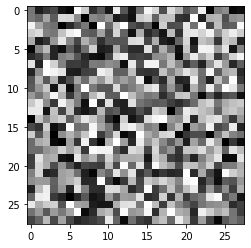

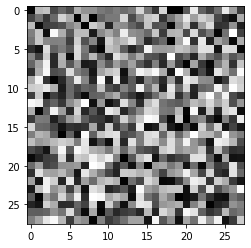

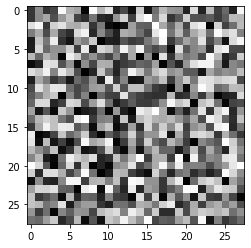

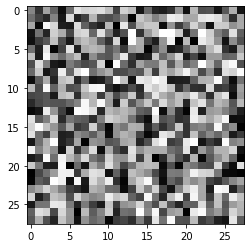

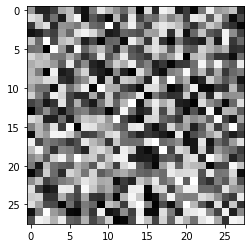

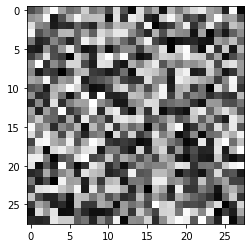

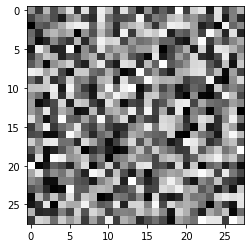

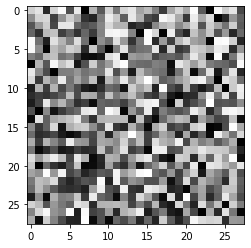

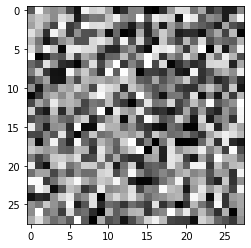

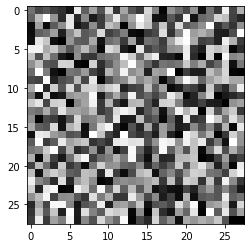

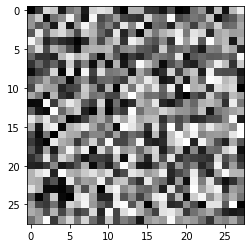

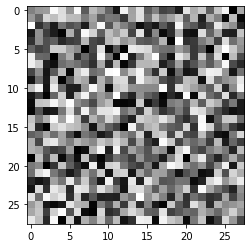

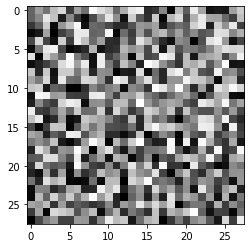

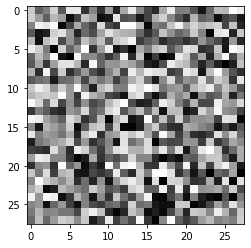

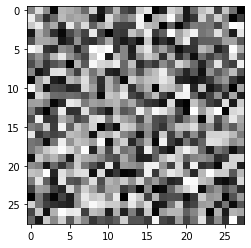

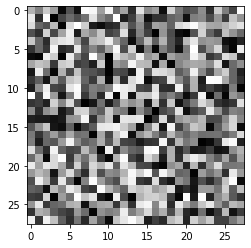

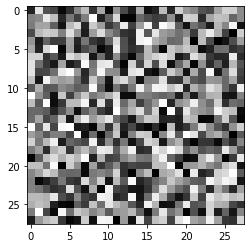

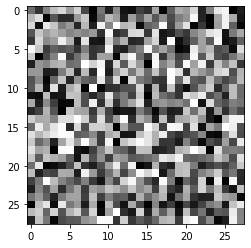

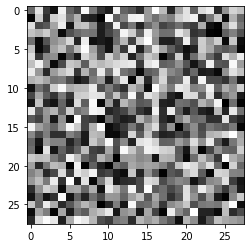

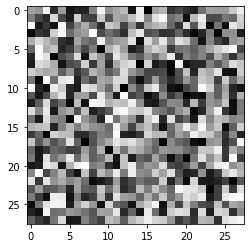

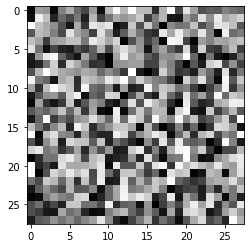

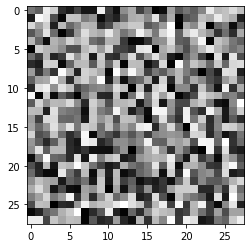

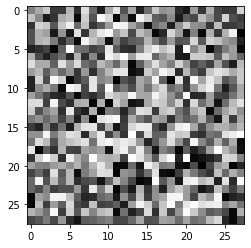

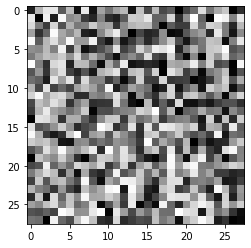

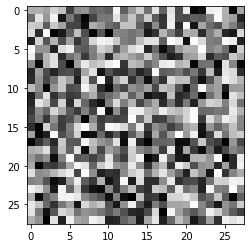

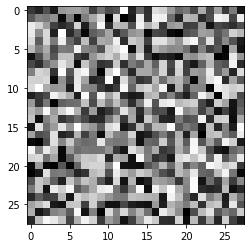

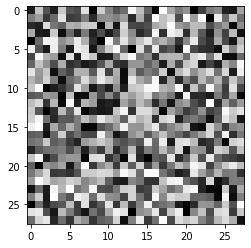

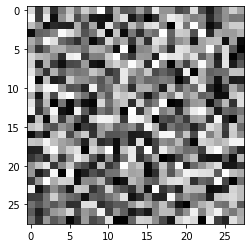

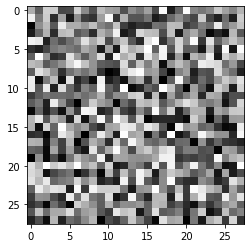

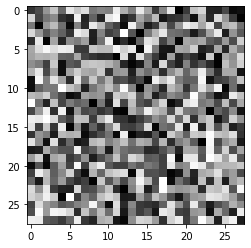

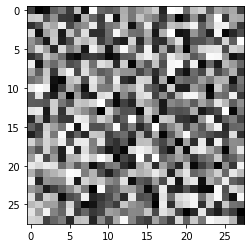

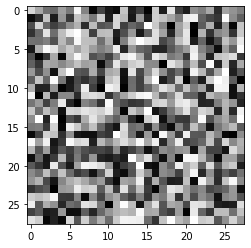

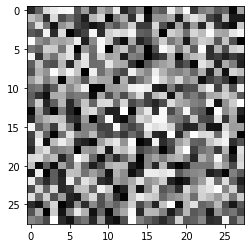

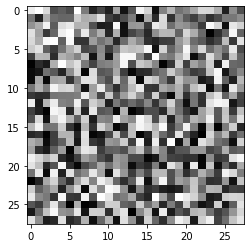

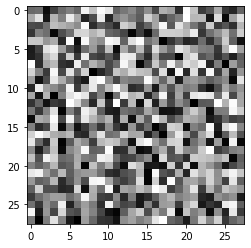

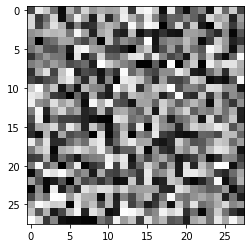

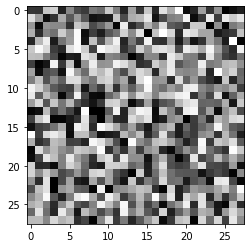

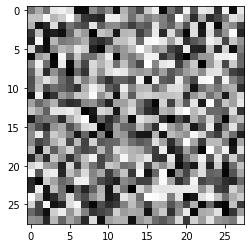

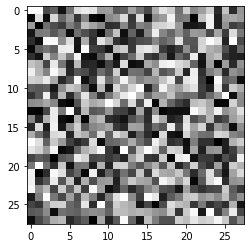

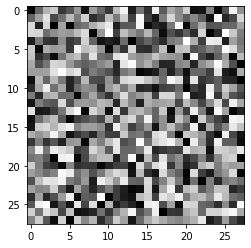

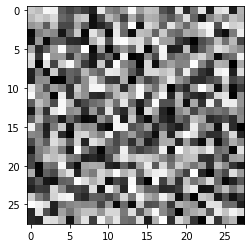

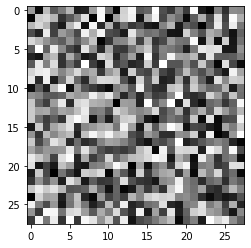

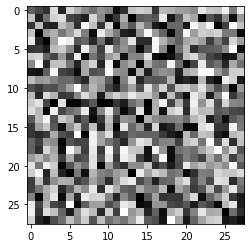

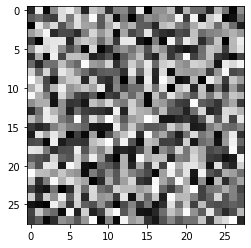

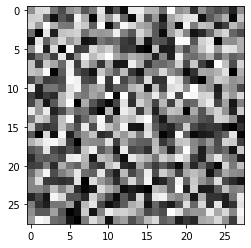

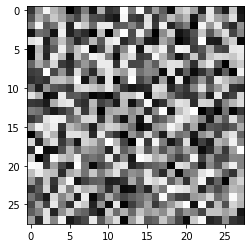

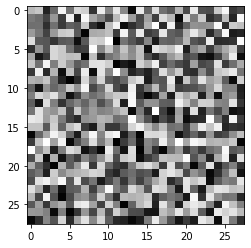

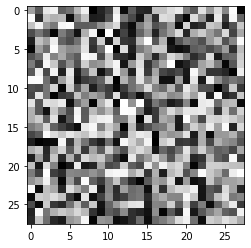

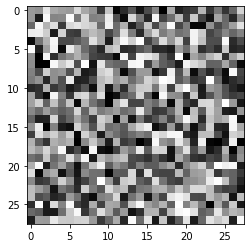

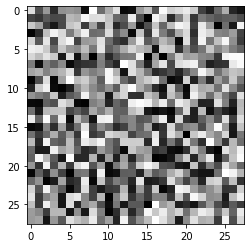

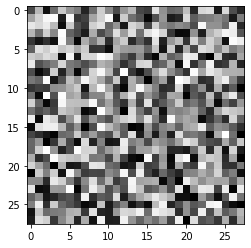

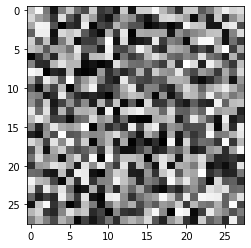

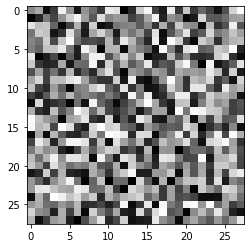

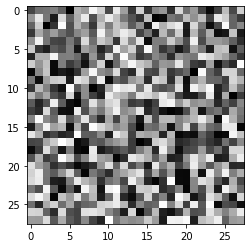

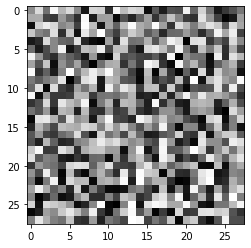

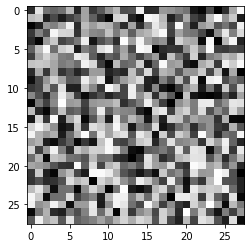

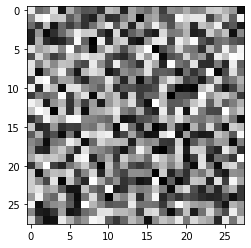

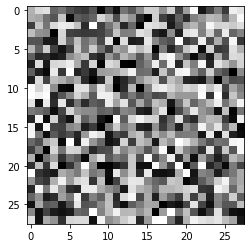

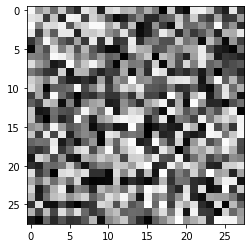

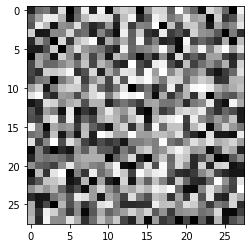

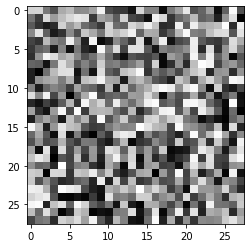

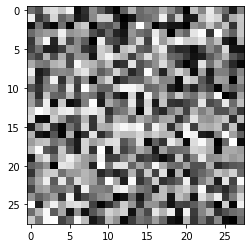

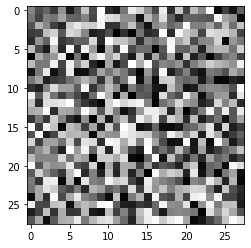

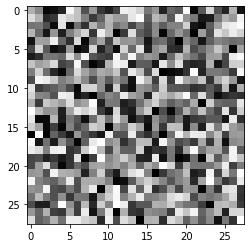

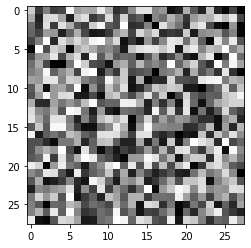

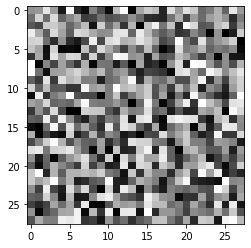

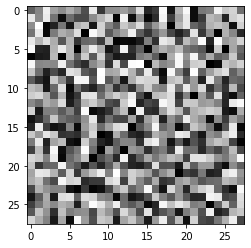

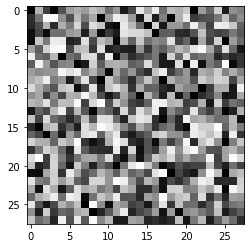

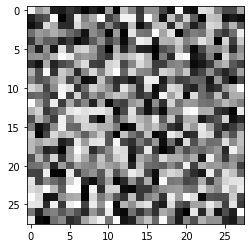

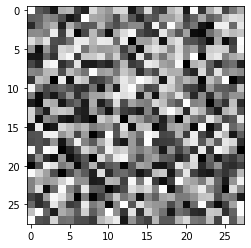

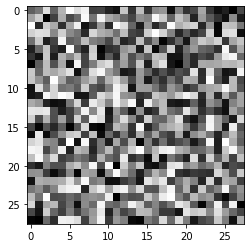

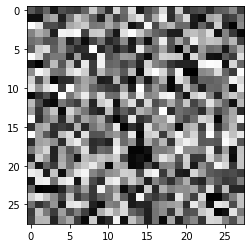

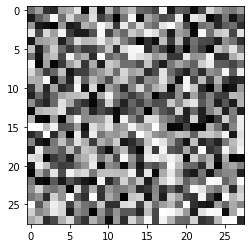

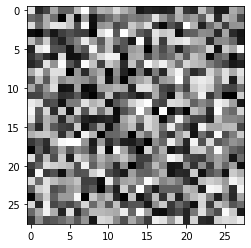

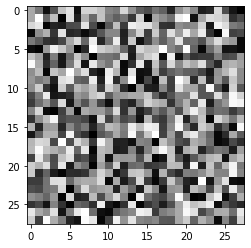

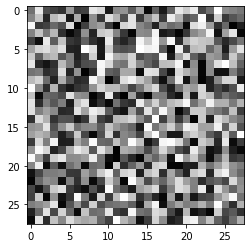

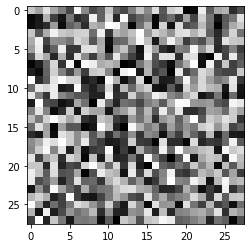

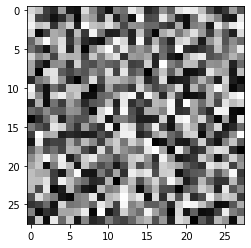

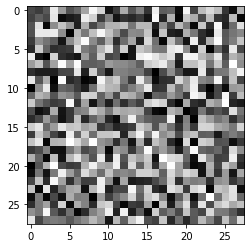

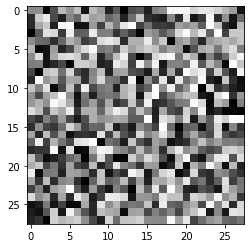

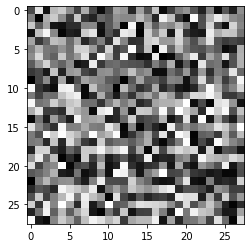

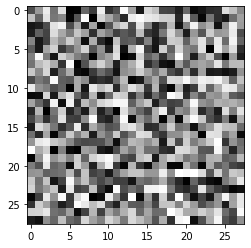

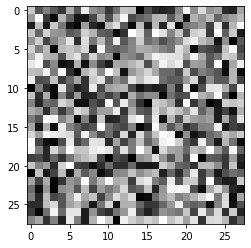

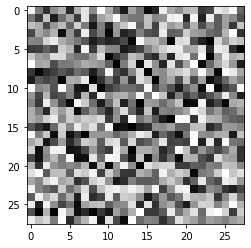

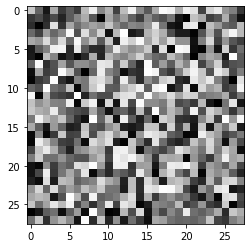

In [70]:
for i in range(624):
  plt.figure()
  plt.imshow(W[:, i].reshape((28, 28)), cmap=plt.get_cmap('gray'))